In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 250)

pd.options.display.float_format = '{:.0f}'.format

In [2]:
from matplotlib import rcParams
import matplotlib as mpl

#svg.fonttype: path

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

#rcParams['axes.prop_cycle'] = cycler('color', [blue, gray, red, dark_gray, green, purple])

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (15, 9),
       dpi= 200,
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

In [3]:
agg_stats = ['games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'tfl_yards', 
                 'sacks_solo', 'sacks_asst', 'sacks_yards', 'int', 'int_yards', 'int_td', 'fum', 'fum_yards', 
                 'fum_td', 'ffum', 'safety', 'punt_ret', 'punt_ret_yards', 'punt_ret_td', 'kick_ret', 'kick_ret_yards',
                 'kick_ret_td', 'total_points'] 

rf_stats = ['rf_games', 'rf_tackles_solo', 'rf_tackles_asst', 'rf_tfl_solo', 'rf_tfl_asst', 'rf_tfl_yards', 
            'rf_sacks_solo', 'rf_sacks_asst', 'rf_sacks_yards', 'rf_int', 'rf_int_yards', 'rf_int_td', 'rf_fum',
            'rf_fum_yards', 'rf_fum_td', 'rf_ffum', 'rf_safety', 'rf_punt_ret', 'rf_punt_ret_yards', 
            'rf_punt_ret_td', 'rf_kick_ret', 'rf_kick_ret_yards', 'rf_kick_ret_td', 'rf_total_points'] 

fr_stats = ['fr_games', 'fr_tackles_solo', 'fr_tackles_asst', 'fr_tfl_solo', 'fr_tfl_asst', 'fr_tfl_yards', 
            'fr_sacks_solo', 'fr_sacks_asst', 'fr_sacks_yards', 'fr_int', 'fr_int_yards', 'fr_int_td', 'fr_fum',
            'fr_fum_yards', 'fr_fum_td', 'fr_ffum', 'fr_safety', 'fr_punt_ret', 'fr_punt_ret_yards', 
            'fr_punt_ret_td', 'fr_kick_ret', 'fr_kick_ret_yards', 'fr_kick_ret_td', 'fr_total_points'] 
        
so_stats = ['so_games', 'so_tackles_solo', 'so_tackles_asst', 'so_tfl_solo', 'so_tfl_asst', 'so_tfl_yards', 
            'so_sacks_solo', 'so_sacks_asst', 'so_sacks_yards', 'so_int', 'so_int_yards', 'so_int_td', 'so_fum',
            'so_fum_yards', 'so_fum_td', 'so_ffum', 'so_safety', 'so_punt_ret', 'so_punt_ret_yards', 
            'so_punt_ret_td', 'so_kick_ret', 'so_kick_ret_yards', 'so_kick_ret_td', 'so_total_points']

jr_stats = ['jr_games', 'jr_tackles_solo', 'jr_tackles_asst', 'jr_tfl_solo', 'jr_tfl_asst', 'jr_tfl_yards', 
            'jr_sacks_solo', 'jr_sacks_asst', 'jr_sacks_yards', 'jr_int', 'jr_int_yards', 'jr_int_td', 'jr_fum',
            'jr_fum_yards', 'jr_fum_td', 'jr_ffum', 'jr_safety', 'jr_punt_ret', 'jr_punt_ret_yards', 
            'jr_punt_ret_td', 'jr_kick_ret', 'jr_kick_ret_yards', 'jr_kick_ret_td', 'jr_total_points'] 
    
sr_stats = ['sr_games', 'sr_tackles_solo', 'sr_tackles_asst', 'sr_tfl_solo', 'sr_tfl_asst', 'sr_tfl_yards', 
            'sr_sacks_solo', 'sr_sacks_asst', 'sr_sacks_yards', 'sr_int', 'sr_int_yards', 'sr_int_td', 'sr_fum',
            'sr_fum_yards', 'sr_fum_td', 'sr_ffum', 'sr_safety', 'sr_punt_ret', 'sr_punt_ret_yards', 
            'sr_punt_ret_td', 'sr_kick_ret', 'sr_kick_ret_yards', 'sr_kick_ret_td', 'sr_total_points']
    
def reset_order(df):
    """Resets column order of all NCAA Bios + Stats columns"""
        
    gen_cols = ['player', 'team', 'ncaa_yr_ct', 'min_year', 'max_year']
 
    cols = df.columns.tolist() 
    
    ordered = gen_cols + agg_stats + rf_stats + fr_stats + so_stats + jr_stats + sr_stats
        
    df = df[ordered]
    return df

def aggregate_stats(df):
    for s in agg_stats:
        if s in df.columns:
            df[s] = 0
        df[s] = df[[c for c in df.columns if c.endswith(s)]].sum(axis = 1, skipna=True)
    return df



## Load NCAA Biographical Data

In [4]:
bios = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/ncaa_bios+stats_names.csv', index_col=0)
bios.info()
bios.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7528 entries, 4153 to 966
Data columns (total 16 columns):
player_id       7528 non-null int64
player          7528 non-null object
team            7528 non-null object
class           7524 non-null object
position        7528 non-null object
height          7528 non-null float64
weight          7528 non-null float64
home_town       7484 non-null object
home_state      7479 non-null object
home_country    7485 non-null object
last_school     7232 non-null object
first           7528 non-null object
last            7528 non-null object
stats_name      7528 non-null object
stats_first     7528 non-null object
stats_last      7528 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 999.8+ KB


,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
4153,1018952,Antuan Aaron,Army,SR,DB,70,188,Dallas,TX,US,Crandall (USMAPS),Antuan,Aaron,Antuan Aaron,Antuan,Aaron
29,1008020,Oliver Aaron,Arizona State,FR,S,74,205,Gainesville,FL,US,Gainesville,Oliver,Aaron,Oliver Aaron,Oliver,Aaron
6269,1056163,Aaron Roundtree,Minnesota,SO,DB,74,185,Eagan,MN,US,ND State College of Science,Aaron,Roundtree,Aaron Roundtree,Roundtree,Aaron
4943,1049471,Michael Abanikanda,Temple,FR,DB,68,185,Brooklyn,NY,US,Thomas Jefferson,Michael,Abanikanda,Michael Abanikanda,Michael,Abanikanda
3464,1015801,Andrew Abbott,UCLA,JR,CB,69,178,Long Beach,CA,US,Mater Dei,Andrew,Abbott,Andrew Abbott,Andrew,Abbott


### Deal with Missing Values

In [5]:
d = bios[bios.home_state.isnull()]
len(d)
d.head(20)

49

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
2960,1033092,A.T. Aoelua,New Mexico State,JR,SS,70,200,NaN,NaN,AS,Fagaitua HS,A.T.,Aoelua,A.T. Aoelua,A.T.,Aoelua
2733,1009161,Ricardo Bates,Houston,JR,DB,71,175,NaN,NaN,NaN,NaN,Ricardo,Bates,Ricardo Bates,Ricardo,Bates
4298,1046230,Dwain Bradshaw,Arizona State,JR,FS,71,220,NaN,NaN,NaN,NaN,Dwain,Bradshaw,Dwain Bradshaw,Dwain,Bradshaw
1783,1000817,Cha'pelle Brown,Colorado,SR,CB,67,175,NaN,NaN,NaN,NaN,Cha'pelle,Brown,Cha'pelle Brown,Cha'pelle,Brown
1146,1002043,Stevie Brown,Michigan,JR,S,72,209,NaN,NaN,NaN,NaN,Stevie,Brown,Stevie Brown,Stevie,Brown
1784,86200,Benjamin Burney,Colorado,SR,CB,71,195,NaN,NaN,NaN,NaN,Benjamin,Burney,Ben Burney,Ben,Burney
4454,1023733,August Campbell,Duke,JR,S,75,235,Freeport,NaN,BS,Christ School [N.C.],August,Campbell,August Campbell,August,Campbell
1147,1017083,Bobby Centlivre,Michigan,SO,CB,72,180,NaN,NaN,NaN,NaN,Bobby,Centlivre,Bobby Centlivre,Bobby,Centlivre
1148,1009858,Artis Chambers,Michigan,SO,S,72,202,NaN,NaN,NaN,NaN,Artis,Chambers,Artis Chambers,Artis,Chambers
2023,1017093,Boubacar Cissoko,Michigan,SO,CB,69,177,NaN,NaN,NaN,NaN,Boubacar,Cissoko,Boubacar Cissoko,Boubacar,Cissoko


In [6]:
# Google players for the missing home_state data

bios.loc[442, 'home_state'] = 'NC'
bios.loc[1146, 'home_state'] = 'IN'
bios.loc[1147, 'home_state'] = 'MI'
bios.loc[1148, 'home_state'] = 'IN'
bios.loc[1149, 'home_state'] = 'MD'
bios.loc[1150, 'home_state'] = 'MI'
bios.loc[1151, 'home_state'] = 'OH'
bios.loc[1152, 'home_state'] = 'MI'
bios.loc[1153, 'home_state'] = 'MI'
bios.loc[1154, 'home_state'] = 'MI'
bios.loc[1155, 'home_state'] = 'NJ'
bios.loc[1156, 'home_state'] = 'MI'
bios.loc[1157, 'home_state'] = 'MI'
bios.loc[1783, 'home_state'] = 'CA'
bios.loc[1784, 'home_state'] = 'CO'
bios.loc[1785, 'home_state'] = 'TX'
bios.loc[1786, 'home_state'] = 'CO'
bios.loc[1787, 'home_state'] = 'CO'
bios.loc[1788, 'home_state'] = 'CO'
bios.loc[1789, 'home_state'] = 'CO'




In [7]:
d = bios[bios.home_state.isnull()]
len(d)
d.head(20)

29

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
2960,1033092,A.T. Aoelua,New Mexico State,JR,SS,70,200,NaN,NaN,AS,Fagaitua HS,A.T.,Aoelua,A.T. Aoelua,A.T.,Aoelua
2733,1009161,Ricardo Bates,Houston,JR,DB,71,175,NaN,NaN,NaN,NaN,Ricardo,Bates,Ricardo Bates,Ricardo,Bates
4298,1046230,Dwain Bradshaw,Arizona State,JR,FS,71,220,NaN,NaN,NaN,NaN,Dwain,Bradshaw,Dwain Bradshaw,Dwain,Bradshaw
4454,1023733,August Campbell,Duke,JR,S,75,235,Freeport,NaN,BS,Christ School [N.C.],August,Campbell,August Campbell,August,Campbell
2023,1017093,Boubacar Cissoko,Michigan,SO,CB,69,177,NaN,NaN,NaN,NaN,Boubacar,Cissoko,Boubacar Cissoko,Boubacar,Cissoko
2734,1032045,Alton Demby,Houston,FR,DB,70,185,NaN,NaN,NaN,NaN,Alton,Demby,Alton Demby,Alton,Demby
3420,1008265,Cedric Febis,Boise State,SR,S,75,206,Amsterdam,NaN,NL,Bishop Kelly HS,Cedric,Febis,Cedric Febis,Cedric,Febis
2735,1032046,Marc Haynes,Houston,FR,DB,70,190,NaN,NaN,NaN,NaN,Marc,Haynes,Marc Haynes,Marc,Haynes
2736,1009168,Roisean Haynes,Houston,JR,DB,71,191,NaN,NaN,NaN,NaN,Roisean,Haynes,Roisean Haynes,Roisean,Haynes
5698,1055067,Grant Helm,Florida Atlantic,JR,DB,72,208,NaN,NaN,NaN,NaN,Grant,Helm,Grant Helm,Grant,Helm


In [8]:
bios.loc[2023, 'home_state'] = 'MI'
bios.loc[2024, 'home_state'] = 'MI'
bios.loc[2025, 'home_state'] = 'OH'
bios.loc[2026, 'home_state'] = 'CA'
bios.loc[2027, 'home_state'] = 'CA'
bios.loc[2028, 'home_state'] = 'FL'
bios.loc[2444, 'home_state'] = 'IL'
bios.loc[2733, 'home_state'] = 'AL'
bios.loc[2734, 'home_state'] = 'TX'
bios.loc[2735, 'home_state'] = 'TX'
bios.loc[2736, 'home_state'] = 'TX'
bios.loc[2737, 'home_state'] = 'TX'
bios.loc[2738, 'home_state'] = 'TX'
bios.loc[2739, 'home_state'] = 'CA'
bios.loc[2740, 'home_state'] = 'TX'
bios.loc[2741, 'home_state'] = 'TX'
bios.loc[2742, 'home_state'] = 'TX'
bios.loc[2743, 'home_state'] = 'TX'

In [9]:
d = bios[bios.home_state.isnull()]
len(d)
d.head(20)

11

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
2960,1033092,A.T. Aoelua,New Mexico State,JR,SS,70,200,NaN,NaN,AS,Fagaitua HS,A.T.,Aoelua,A.T. Aoelua,A.T.,Aoelua
4298,1046230,Dwain Bradshaw,Arizona State,JR,FS,71,220,NaN,NaN,NaN,NaN,Dwain,Bradshaw,Dwain Bradshaw,Dwain,Bradshaw
4454,1023733,August Campbell,Duke,JR,S,75,235,Freeport,NaN,BS,Christ School [N.C.],August,Campbell,August Campbell,August,Campbell
3420,1008265,Cedric Febis,Boise State,SR,S,75,206,Amsterdam,NaN,NL,Bishop Kelly HS,Cedric,Febis,Cedric Febis,Cedric,Febis
5698,1055067,Grant Helm,Florida Atlantic,JR,DB,72,208,NaN,NaN,NaN,NaN,Grant,Helm,Grant Helm,Grant,Helm
5432,1054549,Jonathan Linehan,BYU,FR,DB,72,185,Auckland,NaN,NZ,NaN,Jonathan,Linehan,Jonathan Linehan,Jonathan,Linehan
1990,1009666,Stuart Lips,Marshall,JR,DB,75,208,Herrons Creek,NaN,AU,Paintsville,Stuart,Lips,Stuart Lips,Stuart,Lips
4319,1023048,Cole Lorigan,Arkansas State,SR,DB,70,170,NaN,NaN,NaN,NaN,Cole,Lorigan,Cole Lorigan,Cole,Lorigan
5169,1042608,Mark Nzeocha,Wyoming,SO,SS,75,220,Neusitz,NaN,DE,FOS Ansbach,Mark,Nzeocha,Mark Nzeocha,Mark,Nzeocha
3474,1038967,Anthony Thompson,UCLA,FR,CB,73,205,Montreal,NaN,CA,Vanier College,Anthony,Thompson,Anthony Thompson,Anthony,Thompson


In [10]:
bios.loc[4298, 'home_state'] = 'CA'
bios.loc[4319, 'home_state'] = 'AK'
bios.loc[1990, 'home_state'] = 'OC'
bios.loc[2396, 'home_state'] = 'OC'
bios.loc[2960, 'home_state'] = 'OC'
bios.loc[3420, 'home_state'] = 'OC'
bios.loc[3474, 'home_state'] = 'OC'
bios.loc[4454, 'home_state'] = 'OC'
bios.loc[5169, 'home_state'] = 'OC'
bios.loc[5432, 'home_state'] = 'OC'
bios.loc[5698, 'home_state'] = 'FL'

In [11]:
d = bios[bios.home_state.isnull()]
len(d)
d.head(20)

0

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last


### Find Outliers

In [12]:
# find the NCAA weight outliers

bios = bios.sort_values(by='weight', ascending=False)
bios.head(10)

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
1223,1002507,Sioeli Fakalata,New Mexico State,JR,DB,75,313,Palo Alto,CA,US,St. Francis HS,Sioeli,Fakalata,Sioeli Fakalata,Sioeli,Fakalata
1220,1010238,E.J. Cannon,New Mexico State,JR,DB,72,292,Odessa,TX,US,Odessa/NMMI,E.J.,Cannon,E.J. Cannon,E.J.,Cannon
2563,1031132,Nathan Ollie,Ball State,FR,DB,73,290,Chicago,IL,US,Mount Carmel,Nathan,Ollie,Nathan Ollie,Nathan,Ollie
1324,1010691,Doug Klopacz,Penn State,SO,CB,75,288,Hasbrouck Heights,NJ,US,St. Joseph Regional,Doug,Klopacz,Doug Klopacz,Doug,Klopacz
6101,1047778,Alex Witcpalek,Louisville,SR,S,71,286,Oswego,IL,US,Oswegol,Alex,Witcpalek,Alex Witcpalek,Alex,Witcpalek
4873,1025931,DeVonte Holloman,South Carolina,SR,SS,74,241,Charlotte,NC,US,South Pointe,DeVonte,Holloman,DeVonte Holloman,DeVonte,Holloman
650,1003714,Taylor Read,Texas Tech,SR,S,74,241,O'Donnell,TX,US,O'Donnell,Taylor,Read,Taylor Read,Taylor,Read
667,1011380,Jamie Jordan,UTEP,SO,DB,73,240,El Paso,TX,US,Pierce College,Jamie,Jordan,Jamie Jordan,Jamie,Jordan
1222,1010215,Kenny Evora,New Mexico State,SO,SS,76,239,Widefield,CO,US,Mesa Ridge HS,Kenny,Evora,Ken Evora,Ken,Evora
207,83645,Moise Paul,Florida,SR,DB,72,237,Brooklyn,NY,US,New Utrecht/Northland C.C.,Moise,Paul,Moise Paul,Moise,Paul


In [13]:
# Google players to confirm or correct what appears to be an outlier

# Sioeli Fakalata, EJ Cannon, Nathan Ollie, Doug Klopacz, Alex Witcpalek were actually D/O linemen according to Google
# DeVonte Hollomon moved to LB his senior year
# Taylor Read???
# Jamie Jordan ???
# Kenny Evora - Tight End / LB
bios = bios.drop([1223, 1220, 2563, 1324, 6101, 4873, 1222])
bios.head(10)

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
650,1003714,Taylor Read,Texas Tech,SR,S,74,241,O'Donnell,TX,US,O'Donnell,Taylor,Read,Taylor Read,Taylor,Read
667,1011380,Jamie Jordan,UTEP,SO,DB,73,240,El Paso,TX,US,Pierce College,Jamie,Jordan,Jamie Jordan,Jamie,Jordan
207,83645,Moise Paul,Florida,SR,DB,72,237,Brooklyn,NY,US,New Utrecht/Northland C.C.,Moise,Paul,Moise Paul,Moise,Paul
6218,1056057,Michael Topolinski,Michigan State,SO,DB,73,237,Richmond Hill,ON,CA,New Mexico Military Institute,Michael,Topolinski,Michael Topolinski,Michael,Topolinski
4454,1023733,August Campbell,Duke,JR,S,75,235,Freeport,OC,BS,Christ School [N.C.],August,Campbell,August Campbell,August,Campbell
4897,1049273,Collin LaGasse,SMU,FR,DB,71,235,Austin,TX,US,Lake Travis,Collin,LaGasse,Collin LaGasse,Collin,LaGasse
2248,1003367,Taylor Mays,USC,SR,S,75,235,Seattle,WA,US,O'Dea,Taylor,Mays,Taylor Mays,Taylor,Mays
4337,1038653,Anthony Swain,Auburn,FR,DB,74,235,Gadsden,AL,US,Gadsden City,Anthony,Swain,Anthony Swain,Anthony,Swain
5899,1047403,Mike Svetina,Illinois,SO,S,74,235,Brunswick,OH,US,St. Ignatius,Mike,Svetina,Mike Svetina,Mike,Svetina
3003,1033313,Derek Roback,Notre Dame,FR,S,75,233,Waverly,OH,US,Waverly,Derek,Roback,Derek Roback,Derek,Roback


In [14]:
# Find and confirm or correct NCAA height outliers

bios = bios.sort_values(by='height')
bios.head(10)

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
2091,82784,Frankie Baca,New Mexico,SR,S,60,199,Albuquerque,NM,US,La Cueva HS,Frankie,Baca,Frankie Baca,Frankie,Baca
4861,1049135,Reggie Jackson,South Alabama,FR,CB,61,190,Mobile,AL,US,Faith Academy,Reggie,Jackson,Reggie Jackson,Reggie,Jackson
7315,1049519,Daniel Gray,Utah State,SO,CB,61,170,Lauderdale Lakes,FL,US,Boyd Andersen/Tennessee,Daniel,Gray,Daniel Gray,Daniel,Gray
442,1010302,Josh Milinichik,North Carolina State,JR,FS,65,166,NaN,NC,NaN,asf,Josh,Milinichik,Josh Milinichik,Josh,Milinichik
2781,1032255,Thomas Hankerson,Kansas State,SO,DB,65,156,Delray Beach,FL,US,Hutchinson CC,Thomas,Hankerson,Thomas Hankerson,Thomas,Hankerson
4951,1041688,Corey Alexander,Tennessee,SR,DB,65,165,Gallatin,TN,US,Station Camp/Pittsburgh,Corey,Alexander,Corey Alexander,Corey,Alexander
633,83326,Ben Bitner,Texas A&M,SR,DB,65,169,Round Rock,TX,US,Round Rock,Ben,Bitner,Ben Bitner,Ben,Bitner
5413,1054525,Ryan Pitts,Bowling Green,FR,DB,65,155,Lima,OH,US,Lima Central Catholic,Ryan,Pitts,Ryan Pitts,Ryan,Pitts
1678,1023066,Thomas Moss,Arkansas,SO,CB,66,182,Granite Bay,CA,US,Granite Bay HS,Thomas,Moss,Thomas Moss,Thomas,Moss
1626,1019490,Aaron Murray,Wyoming,FR,CB,66,160,Centennial,CO,US,Mullen,Aaron,Murray,Aaron Murray,Aaron,Murray


In [15]:
# Google each player to confirm or correct height outliers

# again, Googled the 10 shortest players and made corrections where I found different data
# stats were confirmed for a couple of these players, but they never played more than a game or two
bios.loc[2091, 'height'] = 71
bios.loc[7315, 'height'] = 70
bios.loc[7315, 'weight'] = 190

bios.head(10)

,player_id,player,team,class,position,height,weight,home_town,home_state,home_country,last_school,first,last,stats_name,stats_first,stats_last
2091,82784,Frankie Baca,New Mexico,SR,S,71,199,Albuquerque,NM,US,La Cueva HS,Frankie,Baca,Frankie Baca,Frankie,Baca
4861,1049135,Reggie Jackson,South Alabama,FR,CB,61,190,Mobile,AL,US,Faith Academy,Reggie,Jackson,Reggie Jackson,Reggie,Jackson
7315,1049519,Daniel Gray,Utah State,SO,CB,70,190,Lauderdale Lakes,FL,US,Boyd Andersen/Tennessee,Daniel,Gray,Daniel Gray,Daniel,Gray
442,1010302,Josh Milinichik,North Carolina State,JR,FS,65,166,NaN,NC,NaN,asf,Josh,Milinichik,Josh Milinichik,Josh,Milinichik
2781,1032255,Thomas Hankerson,Kansas State,SO,DB,65,156,Delray Beach,FL,US,Hutchinson CC,Thomas,Hankerson,Thomas Hankerson,Thomas,Hankerson
4951,1041688,Corey Alexander,Tennessee,SR,DB,65,165,Gallatin,TN,US,Station Camp/Pittsburgh,Corey,Alexander,Corey Alexander,Corey,Alexander
633,83326,Ben Bitner,Texas A&M,SR,DB,65,169,Round Rock,TX,US,Round Rock,Ben,Bitner,Ben Bitner,Ben,Bitner
5413,1054525,Ryan Pitts,Bowling Green,FR,DB,65,155,Lima,OH,US,Lima Central Catholic,Ryan,Pitts,Ryan Pitts,Ryan,Pitts
1678,1023066,Thomas Moss,Arkansas,SO,CB,66,182,Granite Bay,CA,US,Granite Bay HS,Thomas,Moss,Thomas Moss,Thomas,Moss
1626,1019490,Aaron Murray,Wyoming,FR,CB,66,160,Centennial,CO,US,Mullen,Aaron,Murray,Aaron Murray,Aaron,Murray


### Drop Unneeded Columns

In [16]:
bios = bios.drop(['player_id', 'class', 'position', 'home_town', 'home_country', 'last_school', 'first', 'last'], axis = 1)
bios.info()
bios.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7521 entries, 2091 to 5312
Data columns (total 8 columns):
player         7521 non-null object
team           7521 non-null object
height         7521 non-null float64
weight         7521 non-null float64
home_state     7521 non-null object
stats_name     7521 non-null object
stats_first    7521 non-null object
stats_last     7521 non-null object
dtypes: float64(2), object(6)
memory usage: 848.8+ KB


,player,team,height,weight,home_state,stats_name,stats_first,stats_last
2091,Frankie Baca,New Mexico,71,199,NM,Frankie Baca,Frankie,Baca
4861,Reggie Jackson,South Alabama,61,190,AL,Reggie Jackson,Reggie,Jackson
7315,Daniel Gray,Utah State,70,190,FL,Daniel Gray,Daniel,Gray
442,Josh Milinichik,North Carolina State,65,166,NC,Josh Milinichik,Josh,Milinichik
2781,Thomas Hankerson,Kansas State,65,156,FL,Thomas Hankerson,Thomas,Hankerson


### Save for Later

In [17]:
# bios.to_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/TO_MERGE_ncaa_bios.csv')

## Load NCAA Game Statistics

- describe
- deal with missing values
- fix outliers
- drop unneeded columns
- save for later

In [18]:
stats = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/ncaa_d1_stats.csv', index_col=0)
stats = reset_order(stats)
stats.info()
stats.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 0 to 10535
Columns: 149 entries, player to sr_total_points
dtypes: float64(146), object(3)
memory usage: 12.1+ MB


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,player,team,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,rf_games,rf_tackles_solo,rf_tackles_asst,rf_tfl_solo,rf_tfl_asst,rf_tfl_yards,rf_sacks_solo,rf_sacks_asst,rf_sacks_yards,rf_int,rf_int_yards,rf_int_td,rf_fum,rf_fum_yards,rf_fum_td,rf_ffum,rf_safety,rf_punt_ret,rf_punt_ret_yards,rf_punt_ret_td,rf_kick_ret,...,so_kick_ret_td,so_total_points,jr_games,jr_tackles_solo,jr_tackles_asst,jr_tfl_solo,jr_tfl_asst,jr_tfl_yards,jr_sacks_solo,jr_sacks_asst,jr_sacks_yards,jr_int,jr_int_yards,jr_int_td,jr_fum,jr_fum_yards,jr_fum_td,jr_ffum,jr_safety,jr_punt_ret,jr_punt_ret_yards,jr_punt_ret_td,jr_kick_ret,jr_kick_ret_yards,jr_kick_ret_td,jr_total_points,sr_games,sr_tackles_solo,sr_tackles_asst,sr_tfl_solo,sr_tfl_asst,sr_tfl_yards,sr_sacks_solo,sr_sacks_asst,sr_sacks_yards,sr_int,sr_int_yards,sr_int_td,sr_fum,sr_fum_yards,sr_fum_td,sr_ffum,sr_safety,sr_punt_ret,sr_punt_ret_yards,sr_punt_ret_td,sr_kick_ret,sr_kick_ret_yards,sr_kick_ret_td,sr_total_points
0,Joseph (Mike) Angelo,UCLA,3,2006,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Antuan Aaron,Army,3,2008,2010,33,76,31,2,1,7,1,0,4,1,0,0,0,0,0,0,0,1,4,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,9,20,7,1,0,4,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Oliver Aaron,Arizona State,5,2007,2011,45,79,37,15,2,55,2,0,21,0,0,0,4,0,0,4,0,0,1,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,12,31,16,7,1,27,1,0,11,0,0,0,0,0,0,2,0,0,1,1,0,0,0,6,13,39,18,8,0,27,1,0,10,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,Aaron Abbott,Eastern Michigan,3,2014,2016,19,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Andrew Abbott,UCLA,4,2009,2012,52,134,26,7,0,25,0,0,0,8,64,0,1,0,0,1,0,2,-7,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,13,37,7,2,0,13,0,0,0,4,37,0,0,0,0,0,0,1,-12,0,0,0,0,0,14,53,6,3,0,8,0,0,0,4,27,0,0,0,0,0,0,1,5,0,0,0,0,0


### Describe

In [19]:
stats.describe()

,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,rf_games,rf_tackles_solo,rf_tackles_asst,rf_tfl_solo,rf_tfl_asst,rf_tfl_yards,rf_sacks_solo,rf_sacks_asst,rf_sacks_yards,rf_int,rf_int_yards,rf_int_td,rf_fum,rf_fum_yards,rf_fum_td,rf_ffum,rf_safety,rf_punt_ret,rf_punt_ret_yards,rf_punt_ret_td,rf_kick_ret,rf_kick_ret_yards,rf_kick_ret_td,rf_total_points,...,so_kick_ret_td,so_total_points,jr_games,jr_tackles_solo,jr_tackles_asst,jr_tfl_solo,jr_tfl_asst,jr_tfl_yards,jr_sacks_solo,jr_sacks_asst,jr_sacks_yards,jr_int,jr_int_yards,jr_int_td,jr_fum,jr_fum_yards,jr_fum_td,jr_ffum,jr_safety,jr_punt_ret,jr_punt_ret_yards,jr_punt_ret_td,jr_kick_ret,jr_kick_ret_yards,jr_kick_ret_td,jr_total_points,sr_games,sr_tackles_solo,sr_tackles_asst,sr_tfl_solo,sr_tfl_asst,sr_tfl_yards,sr_sacks_solo,sr_sacks_asst,sr_sacks_yards,sr_int,sr_int_yards,sr_int_td,sr_fum,sr_fum_yards,sr_fum_td,sr_ffum,sr_safety,sr_punt_ret,sr_punt_ret_yards,sr_punt_ret_td,sr_kick_ret,sr_kick_ret_yards,sr_kick_ret_td,sr_total_points
count,10453,10452,10452,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,10453,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,...,7518,7518,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725,5725
mean,3,2009,2011,25,35,20,2,1,8,0,0,3,2,22,0,1,2,0,0,1,11,0,2,43,0,3,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,1,9,15,8,1,0,4,0,0,1,1,9,0,0,1,0,0,0,0,5,0,1,15,0,1,10,18,10,1,1,5,0,0,2,1,12,0,0,1,0,0,0,1,5,0,1,18,0,1
std,1,4,4,21,53,33,4,2,19,1,1,11,3,52,1,2,11,0,0,7,73,0,10,231,0,11,4,4,3,0,0,1,0,0,1,0,6,0,0,1,0,0,0,0,4,0,1,32,0,1,...,0,4,5,17,11,2,1,8,1,0,5,1,24,0,0,6,0,1,0,3,30,0,3,80,0,5,4,19,12,2,1,10,1,0,6,1,26,0,0,7,0,1,0,3,32,0,4,97,0,6
min,0,2000,2004,0,0,0,0,0,0,0,0,0,0,-35,0,0,-15,0,0,0,-52,0,0,-60,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,0,-5,0,0,-2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,-20,0,0,-6,0,0,0,0,-19,0,0,-15,0,0,0,0,0,0,0,0,0,0,0,0,-15,0,0,-9,0,0,0,0,-18,0,0,-13,0,0
25%,2,2006,2008,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,3,2009,2011,24,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,11,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,4,2012,2014,41,57,30,2,1,9,0,0,0,2,19,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,12,27,13,1,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,32,17,2,1,6,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0
max,5,2017,2017,174,780,705,84,42,438,28,15,248,45,784,8,33,255,4,3,192,1998,7,188,4716,15,252,14,52,39,8,3,47,3,3,29,6,120,1,2,53,1,3,0,10,206,2,42,1083,1,42,...,3,78,15,87,74,18,13,99,12,7,87,14,301,3,2,112,3,6,1,41,650,3,59,1286,3,114,17,87,82,19,15,124,14,8,115,10,220,3,3,102,3,6,2,42,535,4,49,1138,4,138


### Deal with Missing Values

In [20]:
# fillna with 0

stats = stats.fillna(0)

### Identify and Confirm or Correct Outliers

In [21]:
# re-aggregate stats

stats = stats.drop(agg_stats, axis = 1)
stats = aggregate_stats(stats)
stats = reset_order(stats)
stats = stats.reset_index(drop = True)
stats.head()
stats.describe()

,player,team,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,rf_games,rf_tackles_solo,rf_tackles_asst,rf_tfl_solo,rf_tfl_asst,rf_tfl_yards,rf_sacks_solo,rf_sacks_asst,rf_sacks_yards,rf_int,rf_int_yards,rf_int_td,rf_fum,rf_fum_yards,rf_fum_td,rf_ffum,rf_safety,rf_punt_ret,rf_punt_ret_yards,rf_punt_ret_td,rf_kick_ret,...,so_kick_ret_td,so_total_points,jr_games,jr_tackles_solo,jr_tackles_asst,jr_tfl_solo,jr_tfl_asst,jr_tfl_yards,jr_sacks_solo,jr_sacks_asst,jr_sacks_yards,jr_int,jr_int_yards,jr_int_td,jr_fum,jr_fum_yards,jr_fum_td,jr_ffum,jr_safety,jr_punt_ret,jr_punt_ret_yards,jr_punt_ret_td,jr_kick_ret,jr_kick_ret_yards,jr_kick_ret_td,jr_total_points,sr_games,sr_tackles_solo,sr_tackles_asst,sr_tfl_solo,sr_tfl_asst,sr_tfl_yards,sr_sacks_solo,sr_sacks_asst,sr_sacks_yards,sr_int,sr_int_yards,sr_int_td,sr_fum,sr_fum_yards,sr_fum_td,sr_ffum,sr_safety,sr_punt_ret,sr_punt_ret_yards,sr_punt_ret_td,sr_kick_ret,sr_kick_ret_yards,sr_kick_ret_td,sr_total_points
0,Joseph (Mike) Angelo,UCLA,3,2006,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Antuan Aaron,Army,3,2008,2010,33,76,31,2,1,7,1,0,4,1,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,9,20,7,1,0,4,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Oliver Aaron,Arizona State,5,2007,2011,45,79,37,15,2,55,2,0,21,0,0,0,4,0,0,4,0,0,1,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,12,31,16,7,1,27,1,0,11,0,0,0,0,0,0,2,0,0,1,1,0,0,0,6,13,39,18,8,0,27,1,0,10,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,Aaron Abbott,Eastern Michigan,3,2014,2016,19,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andrew Abbott,UCLA,4,2009,2012,52,134,26,7,0,25,0,0,0,8,64,0,1,0,0,1,0,2,-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,13,37,7,2,0,13,0,0,0,4,37,0,0,0,0,0,0,1,-12,0,0,0,0,0,14,53,6,3,0,8,0,0,0,4,27,0,0,0,0,0,0,1,5,0,0,0,0,0


,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,rf_games,rf_tackles_solo,rf_tackles_asst,rf_tfl_solo,rf_tfl_asst,rf_tfl_yards,rf_sacks_solo,rf_sacks_asst,rf_sacks_yards,rf_int,rf_int_yards,rf_int_td,rf_fum,rf_fum_yards,rf_fum_td,rf_ffum,rf_safety,rf_punt_ret,rf_punt_ret_yards,rf_punt_ret_td,rf_kick_ret,rf_kick_ret_yards,rf_kick_ret_td,...,so_kick_ret_td,so_total_points,jr_games,jr_tackles_solo,jr_tackles_asst,jr_tfl_solo,jr_tfl_asst,jr_tfl_yards,jr_sacks_solo,jr_sacks_asst,jr_sacks_yards,jr_int,jr_int_yards,jr_int_td,jr_fum,jr_fum_yards,jr_fum_td,jr_ffum,jr_safety,jr_punt_ret,jr_punt_ret_yards,jr_punt_ret_td,jr_kick_ret,jr_kick_ret_yards,jr_kick_ret_td,jr_total_points,sr_games,sr_tackles_solo,sr_tackles_asst,sr_tfl_solo,sr_tfl_asst,sr_tfl_yards,sr_sacks_solo,sr_sacks_asst,sr_sacks_yards,sr_int,sr_int_yards,sr_int_td,sr_fum,sr_fum_yards,sr_fum_td,sr_ffum,sr_safety,sr_punt_ret,sr_punt_ret_yards,sr_punt_ret_td,sr_kick_ret,sr_kick_ret_yards,sr_kick_ret_td,sr_total_points
count,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,...,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536,10536
mean,3,1993,1995,23,32,18,2,1,8,0,0,3,2,20,0,1,2,0,1,0,1,10,0,2,40,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,6,10,6,1,0,3,0,0,1,0,6,0,0,1,0,0,0,0,3,0,0,10,0,1,5,10,6,1,0,3,0,0,1,0,6,0,0,1,0,0,0,0,3,0,0,10,0,1
std,1,179,179,18,45,28,4,2,17,1,0,10,3,45,0,1,10,0,1,0,6,66,0,9,200,0,10,2,2,1,0,0,1,0,0,1,0,3,0,0,1,0,0,0,0,2,0,1,18,0,...,0,3,6,16,10,1,1,7,1,0,4,1,20,0,0,5,0,1,0,2,25,0,3,67,0,4,6,16,10,2,1,8,1,0,5,1,20,0,0,5,0,1,0,2,23,0,3,72,0,5
min,0,0,0,0,0,0,0,0,0,0,0,0,0,-35,0,0,-9,0,0,0,0,-26,0,0,-60,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,0,-5,0,0,-2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,-20,0,0,-6,0,0,0,0,-19,0,0,-15,0,0,0,0,0,0,0,0,0,0,0,0,-15,0,0,-9,0,0,0,0,-18,0,0,-13,0,0
25%,2,2006,2008,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,3,2009,2011,23,7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,4,2012,2014,39,54,28,2,1,8,0,0,0,2,18,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,12,17,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,16,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,5,2017,2017,60,286,235,47,29,314,28,15,247,24,494,5,17,147,3,14,2,127,1752,7,144,3615,6,252,14,52,39,8,3,47,3,3,29,6,120,1,2,53,1,3,0,10,206,2,42,1083,1,...,3,78,15,87,74,18,13,99,12,7,87,14,301,3,2,112,3,6,1,41,650,3,59,1286,3,114,17,87,82,19,15,124,14,8,115,10,220,3,3,102,3,6,2,42,535,4,49,1138,4,138


In [22]:
# Look for games > 60

o = stats[stats.games > 60]
len(o)
o[['player', 'team', 'games', 'rf_games', 'fr_games', 'so_games', 'jr_games', 'sr_games']].head()
stats[['player', 'team', 'games', 'rf_games', 'fr_games', 'so_games', 'jr_games', 'sr_games']].head(10)

0

,player,team,games,rf_games,fr_games,so_games,jr_games,sr_games


,player,team,games,rf_games,fr_games,so_games,jr_games,sr_games
0,Joseph (Mike) Angelo,UCLA,0,0,0,0,0,0
1,Antuan Aaron,Army,33,0,12,12,9,0
2,Oliver Aaron,Arizona State,45,0,12,8,12,13
3,Aaron Abbott,Eastern Michigan,19,0,0,11,8,0
4,Andrew Abbott,UCLA,52,0,13,12,13,14
5,Jim Abbott,USC,7,0,2,1,4,0
6,Isa Abdul-Quddus,Fordham,40,0,11,7,11,11
7,Husain Abdullah,Washington State,46,1,11,10,12,12
8,Junaid Abdullah,Akron,0,0,0,0,0,0
9,Muhammad Abdullah,Kentucky,45,0,11,12,11,11


In [23]:
# Look at tackles_solo 

stat = 'tackles_solo'

stats = stats.sort_values(by = stat, ascending=False)

stats[['player', 'team', 'ncaa_yr_ct', stat, 'rf_' + stat, 'fr_' + stat, 'so_' + stat, 'jr_' + stat, 'sr_' + stat]].head(10)


,player,team,ncaa_yr_ct,tackles_solo,rf_tackles_solo,fr_tackles_solo,so_tackles_solo,jr_tackles_solo,sr_tackles_solo
2240,Cody Davis,Texas Tech,4,286,0,61,69,72,84
1260,Deone Bucannon,Washington State,4,270,0,67,60,65,78
844,Quin Blanding,Virginia,4,260,0,60,68,70,62
8364,Davonte Shannon,Buffalo,4,258,0,73,70,50,65
9529,Jason Venson,UCF,5,239,0,67,43,69,60
6265,Maurice McKnight,San Jose State,4,236,0,51,74,51,60
1734,Patrick Chung,Oregon,5,236,0,58,49,71,58
10111,Ian Williams,Fordham,5,232,0,41,69,66,56
6114,Kishawn McClain,North Texas,4,232,0,21,77,67,67
10321,Andrew Wingard,Wyoming,3,228,0,83,75,70,0


In [24]:
# Look at int 

stat = 'int'

stats = stats.sort_values(by = stat, ascending=False)

stats[['player', 'team', 'ncaa_yr_ct', stat, 'rf_' + stat, 'fr_' + stat, 'so_' + stat, 'jr_' + stat, 'sr_' + stat]].head(10)


,player,team,ncaa_yr_ct,int,rf_int,fr_int,so_int,jr_int,sr_int
5799,Corey Lynch,Appalachian State,5,24,6,1,6,5,6
5495,Mark LeGree,Appalachian State,4,22,0,0,10,7,5
8561,Alphonso Smith,Wake Forest,5,21,0,3,3,8,7
4719,Shannon James,Massachusetts,4,20,0,4,4,8,4
9255,Darian Thompson,Boise State,5,19,0,3,4,7,5
1388,Kevin Byard,Middle Tennessee,5,19,0,4,5,6,4
9025,John Talley,Duke,4,18,0,2,4,5,7
8806,Weston Steelhammer,Air Force,4,18,0,0,6,5,7
460,Sean Baker,Ball State,5,18,0,6,4,6,2
9857,Eric Weddle,Utah,4,18,0,3,4,4,7


In [25]:
# Look at int_yards

stat = 'int_yards'

stats = stats.sort_values(by = stat, ascending=False)

stats[['player', 'team', 'ncaa_yr_ct', 'int', stat, 'rf_' + stat, 'fr_' + stat, 'so_' + stat, 'jr_' + stat, 'sr_' + stat]].head(10)


,player,team,ncaa_yr_ct,int,int_yards,rf_int_yards,fr_int_yards,so_int_yards,jr_int_yards,sr_int_yards
738,Eric Berry,Tennessee,3,14,494,0,222,265,7,0
7467,Tracy Porter,Indiana,4,16,413,0,115,108,53,137
5799,Corey Lynch,Appalachian State,5,24,405,61,8,121,101,114
2379,Quintin Demps,UTEP,5,17,404,0,73,50,61,220
9025,John Talley,Duke,4,18,395,0,0,172,73,150
8204,Tyler Sash,Iowa,4,13,392,0,147,203,42,0
8170,Dominick Sanders,Georgia,4,16,381,0,64,205,27,85
1388,Kevin Byard,Middle Tennessee,5,19,377,0,167,159,1,50
7357,Darius Phillips,Western Michigan,5,12,376,0,0,50,263,63
801,Ahmad Black,Florida,4,13,362,0,0,191,0,171


### Drop Unneeded Columns

In [26]:
prefixes = ['rf_', 'fr_', 'so_', 'jr_', 'sr_']

for s in prefixes:
    stats = stats.drop([c for c in stats.columns if c.startswith(s)], axis = 1)

stats = stats.reset_index(drop = 0)

stats.head()
stats.info()

,index,player,team,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points
0,738,Eric Berry,Tennessee,3,2007,2009,39,157,88,16,3,45,3,0,11,14,494,3,6,103,0,2,0,0,0,0,6,132,0,18
1,7467,Tracy Porter,Indiana,4,2004,2007,43,156,34,5,1,18,1,0,9,16,413,1,4,147,1,2,0,35,477,1,1,27,0,18
2,5799,Corey Lynch,Appalachian State,5,2003,2007,55,154,133,8,2,22,0,0,0,24,405,1,4,31,2,2,0,2,40,0,1,14,0,18
3,2379,Quintin Demps,UTEP,5,2003,2007,47,135,82,4,1,13,0,0,0,17,404,3,4,57,1,2,0,15,200,0,35,773,1,30
4,9025,John Talley,Duke,4,2003,2006,46,0,0,0,0,0,0,0,0,18,395,3,0,0,0,0,0,0,0,0,0,0,0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 30 columns):
index             10536 non-null int64
player            10536 non-null object
team              10536 non-null object
ncaa_yr_ct        10536 non-null float64
min_year          10536 non-null float64
max_year          10536 non-null float64
games             10536 non-null float64
tackles_solo      10536 non-null float64
tackles_asst      10536 non-null float64
tfl_solo          10536 non-null float64
tfl_asst          10536 non-null float64
tfl_yards         10536 non-null float64
sacks_solo        10536 non-null float64
sacks_asst        10536 non-null float64
sacks_yards       10536 non-null float64
int               10536 non-null float64
int_yards         10536 non-null float64
int_td            10536 non-null float64
fum               10536 non-null float64
fum_yards         10536 non-null float64
fum_td            10536 non-null float64
ffum              10536 non-null f

### Save for Later

In [27]:
# bios.to_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/TO_MERGE_ncaa_stats.csv')

## Merge NCAA Bios and Stats

In [28]:
ncaa = pd.merge(bios, stats, how='left', left_on=['stats_name', 'team'], right_on=['player', 'team'],
                          validate='one_to_one')
ncaa.info()
ncaa.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7521 entries, 0 to 7520
Data columns (total 37 columns):
player_x          7521 non-null object
team              7521 non-null object
height            7521 non-null float64
weight            7521 non-null float64
home_state        7521 non-null object
stats_name        7521 non-null object
stats_first       7521 non-null object
stats_last        7521 non-null object
index             6051 non-null float64
player_y          6051 non-null object
ncaa_yr_ct        6051 non-null float64
min_year          6051 non-null float64
max_year          6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               60

,player_x,team,height,weight,home_state,stats_name,stats_first,stats_last,index,player_y,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points
0,Frankie Baca,New Mexico,71,199,NM,Frankie Baca,Frankie,Baca,407,Frankie Baca,5,2005,2009,50,67,55,0,3,4,0,0,0,2,6,0,2,0,0,2,0,0,0,0,0,0,0,0
1,Reggie Jackson,South Alabama,61,190,AL,Reggie Jackson,Reggie,Jackson,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Daniel Gray,Utah State,70,190,FL,Daniel Gray,Daniel,Gray,3557,Daniel Gray,4,2013,2016,37,52,35,1,1,6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6
3,Josh Milinichik,North Carolina State,65,166,NC,Josh Milinichik,Josh,Milinichik,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Thomas Hankerson,Kansas State,65,156,FL,Thomas Hankerson,Thomas,Hankerson,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,Corey Alexander,Tennessee,65,165,TN,Corey Alexander,Corey,Alexander,116,Corey Alexander,2,2011,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Ben Bitner,Texas A&M,65,169,TX,Ben Bitner,Ben,Bitner,798,Ben Bitner,3,2005,2007,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Ryan Pitts,Bowling Green,65,155,OH,Ryan Pitts,Ryan,Pitts,7415,Ryan Pitts,1,2013,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Thomas Moss,Arkansas,66,182,CA,Thomas Moss,Thomas,Moss,6684,Thomas Moss,1,2009,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Aaron Murray,Wyoming,66,160,CO,Aaron Murray,Aaron,Murray,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [29]:
# Look at names of bios players not found in stats
ncaa[['first', 'last']] = ncaa.stats_name.str.split(' ', n = 1, expand = True)

ncaa.head()

,player_x,team,height,weight,home_state,stats_name,stats_first,stats_last,index,player_y,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,first,last
0,Frankie Baca,New Mexico,71,199,NM,Frankie Baca,Frankie,Baca,407,Frankie Baca,5,2005,2009,50,67,55,0,3,4,0,0,0,2,6,0,2,0,0,2,0,0,0,0,0,0,0,0,Frankie,Baca
1,Reggie Jackson,South Alabama,61,190,AL,Reggie Jackson,Reggie,Jackson,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Reggie,Jackson
2,Daniel Gray,Utah State,70,190,FL,Daniel Gray,Daniel,Gray,3557,Daniel Gray,4,2013,2016,37,52,35,1,1,6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6,Daniel,Gray
3,Josh Milinichik,North Carolina State,65,166,NC,Josh Milinichik,Josh,Milinichik,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Josh,Milinichik
4,Thomas Hankerson,Kansas State,65,156,FL,Thomas Hankerson,Thomas,Hankerson,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Thomas,Hankerson


In [30]:
ncaa = ncaa.dropna(axis=0, how='all', subset=['ncaa_yr_ct', 'games'])

ncaa = ncaa.drop(['player_y', 'stats_name', 'stats_first', 'stats_last', 'index', 'first', 'last'], axis=1)
ncaa = ncaa.rename({'player_x': 'player'}, axis=1)
ncaa = ncaa.reset_index(drop=True)
ncaa.info()
ncaa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051 entries, 0 to 6050
Data columns (total 32 columns):
player            6051 non-null object
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
min_year          6051 non-null float64
max_year          6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td          

,player,team,height,weight,home_state,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points
0,Frankie Baca,New Mexico,71,199,NM,5,2005,2009,50,67,55,0,3,4,0,0,0,2,6,0,2,0,0,2,0,0,0,0,0,0,0,0
1,Daniel Gray,Utah State,70,190,FL,4,2013,2016,37,52,35,1,1,6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6
2,Corey Alexander,Tennessee,65,165,TN,2,2011,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ben Bitner,Texas A&M,65,169,TX,3,2005,2007,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ryan Pitts,Bowling Green,65,155,OH,1,2013,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Load NFL Data

In [31]:
# ncaa.to_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/MERGED_ncaa_bios+stats.csv')

In [32]:
nfl = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/nfl_FINAL.csv', index_col=0)

nfl.info()
nfl.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1307
Data columns (total 21 columns):
nfl_player      1308 non-null object
in_nfl          1308 non-null bool
success         1308 non-null bool
last_name       1308 non-null object
first_name      1308 non-null object
pref_name       1308 non-null object
nfl_position    1308 non-null object
nfl_height      1308 non-null int64
nfl_weight      1302 non-null float64
birth_date      1297 non-null object
birth_year      1297 non-null float64
birth_month     1297 non-null float64
birth_day       1297 non-null float64
hs_state        830 non-null object
high_school     863 non-null object
college         1301 non-null object
season_count    1308 non-null int64
rookie          1308 non-null int64
last_season     1308 non-null int64
seasons         1308 non-null object
ncaa_name       1308 non-null object
dtypes: bool(2), float64(4), int64(4), object(11)
memory usage: 206.9+ KB


,nfl_player,in_nfl,success,last_name,first_name,pref_name,nfl_position,nfl_height,nfl_weight,birth_date,birth_year,birth_month,birth_day,hs_state,high_school,college,season_count,rookie,last_season,seasons,ncaa_name
0,Isa Abdul-Quddus,True,True,Abdul-Quddus,Isa,Isa,FS,73,203,1988-12-14,1988,12,14,NJ,Union (NJ),Fordham,6,2011,2016,"[2011, 2012, 2013, 2014, 2015, 2016]",Isa Abdul-Quddus
1,Husain Abdullah,True,True,Abdullah,Husain,Husain,FS,72,204,1985-07-27,1985,7,27,CA,Pomona (CA),Washington State,7,2008,2015,"[2008, 2009, 2010, 2011, 2013, 2014, 2015]",Husain Abdullah
2,Hamza Abdullah,True,True,Abdullah,Hamza,Hamza,S,74,216,1983-08-20,1983,8,20,NaN,NaN,Washington State,7,2005,2011,"[2005, 2006, 2007, 2008, 2009, 2010, 2011]",Hamza Abdullah
3,Kenneth Acker,True,True,Acker,Kenneth,Kenneth,CB,72,195,1992-02-06,1992,2,6,OR,Grant (OR),Southern Methodist,3,2015,2017,"[2015, 2016, 2017]",Kenneth Acker
4,Jamal Adams,True,False,Adams,Jamal,Jamal,SS,73,213,1995-10-17,1995,10,17,TX,Carrollton Hebron (TX),Louisiana State,1,2017,2017,[2017],Jamal Adams


In [33]:
nfl = nfl.rename({'player':'nfl_player', 'height':'nfl_height', 'weight':'nfl_weight', 'position':'nfl_position'}, 
                axis='columns')

nfl['in_nfl'] = True
nfl['success'] = [x >= 3 for x in nfl.season_count]

cols = nfl.columns.tolist()
cols[1:1] = cols[-1:]
del cols[-1:]
nfl = nfl[cols]

nfl.head()

,nfl_player,ncaa_name,in_nfl,success,last_name,first_name,pref_name,nfl_position,nfl_height,nfl_weight,birth_date,birth_year,birth_month,birth_day,hs_state,high_school,college,season_count,rookie,last_season,seasons
0,Isa Abdul-Quddus,Isa Abdul-Quddus,True,True,Abdul-Quddus,Isa,Isa,FS,73,203,1988-12-14,1988,12,14,NJ,Union (NJ),Fordham,6,2011,2016,"[2011, 2012, 2013, 2014, 2015, 2016]"
1,Husain Abdullah,Husain Abdullah,True,True,Abdullah,Husain,Husain,FS,72,204,1985-07-27,1985,7,27,CA,Pomona (CA),Washington State,7,2008,2015,"[2008, 2009, 2010, 2011, 2013, 2014, 2015]"
2,Hamza Abdullah,Hamza Abdullah,True,True,Abdullah,Hamza,Hamza,S,74,216,1983-08-20,1983,8,20,NaN,NaN,Washington State,7,2005,2011,"[2005, 2006, 2007, 2008, 2009, 2010, 2011]"
3,Kenneth Acker,Kenneth Acker,True,True,Acker,Kenneth,Kenneth,CB,72,195,1992-02-06,1992,2,6,OR,Grant (OR),Southern Methodist,3,2015,2017,"[2015, 2016, 2017]"
4,Jamal Adams,Jamal Adams,True,False,Adams,Jamal,Jamal,SS,73,213,1995-10-17,1995,10,17,TX,Carrollton Hebron (TX),Louisiana State,1,2017,2017,[2017]


## Merge NFL Data with NCAA Bios and Stats

In [34]:
all_players = pd.merge(ncaa, nfl, how='left', left_on=['player', 'team'], right_on=['ncaa_name', 'college'],
                       validate='one_to_one')

all_players.info()
all_players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 53 columns):
player            6051 non-null object
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
min_year          6051 non-null float64
max_year          6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td          

,player,team,height,weight,home_state,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,nfl_player,ncaa_name,in_nfl,success,last_name,first_name,pref_name,nfl_position,nfl_height,nfl_weight,birth_date,birth_year,birth_month,birth_day,hs_state,high_school,college,season_count,rookie,last_season,seasons
0,Frankie Baca,New Mexico,71,199,NM,5,2005,2009,50,67,55,0,3,4,0,0,0,2,6,0,2,0,0,2,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN
1,Daniel Gray,Utah State,70,190,FL,4,2013,2016,37,52,35,1,1,6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN
2,Corey Alexander,Tennessee,65,165,TN,2,2011,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN
3,Ben Bitner,Texas A&M,65,169,TX,3,2005,2007,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN
4,Ryan Pitts,Bowling Green,65,155,OH,1,2013,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN


In [73]:
df = all_players
df.describe()

,height,weight,ncaa_yr_ct,min_year,max_year,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,nfl_height,nfl_weight,birth_year,birth_month,birth_day,season_count,rookie,last_season
count,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,519.000,519.000,516.000,516.000,516.000,519.000,519.000,519.000
mean,71.493,191.205,3.236,2008.087,2010.353,25.030,42.014,23.492,2.188,1.035,9.279,0.423,0.108,3.454,1.747,22.970,0.161,0.868,2.207,0.059,0.764,0.003,1.216,11.446,0.036,1.977,44.104,0.023,2.610,71.674,198.414,1989.587,6.370,16.109,3.472,2012.505,2015.064
std,1.793,13.820,1.360,44.812,44.861,17.978,49.352,29.822,3.651,1.896,16.753,1.117,0.420,9.261,2.931,48.623,0.493,1.486,10.608,0.259,1.334,0.057,6.553,69.977,0.255,9.070,214.915,0.229,10.013,1.540,11.238,2.892,3.476,8.661,2.303,2.783,2.433
min,65.000,146.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-25.000,0.000,0.000,-9.000,0.000,0.000,0.000,0.000,-14.000,0.000,0.000,-8.000,0.000,0.000,68.000,158.000,1983.000,1.000,1.000,1.000,2008.000,2008.000
25%,70.000,181.000,2.000,2007.000,2009.000,7.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,71.000,190.000,1987.000,3.000,9.000,2.000,2010.000,2014.000
50%,71.000,190.000,4.000,2009.000,2011.000,25.000,20.000,11.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,72.000,198.000,1990.000,6.000,16.000,3.000,2013.000,2016.000
75%,73.000,200.000,4.000,2011.000,2013.000,42.000,72.000,37.000,3.000,1.000,12.000,0.000,0.000,0.000,2.000,25.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,206.000,1992.000,9.000,23.000,5.000,2015.000,2017.000
max,78.000,241.000,5.000,2015.000,2017.000,58.000,286.000,202.000,37.000,24.000,198.000,17.000,6.000,144.000,21.000,494.000,4.000,17.000,147.000,3.000,12.000,2.000,125.000,1752.000,7.000,144.000,3615.000,6.000,252.000,76.000,230.000,1995.000,12.000,31.000,10.000,2017.000,2017.000


In [36]:
# Examine the NFL players who weren't found in the NCAA DF

missing = nfl[~nfl.ncaa_name.isin(ncaa.player)]
len(missing)


678

In [37]:
# Drop from missing: players who didn't play at a D1 school won't be in the NCAA DF
not_d1 = missing[~missing.college.isin(ncaa.team)]
print('DROPPED - NOT D1: {}'.format(len(not_d1)))
      
missing = missing.drop(not_d1.index, axis = 0)
print('STILL MISSING: {}'.format(len(missing)))

DROPPED - NOT D1: 242
STILL MISSING: 436


In [38]:
# players who retired from the NFL before 2009 won't be in the NCAA DF
too_old = missing[missing.rookie < 2009]
print('DROPPED - TOO OLD: {}'.format(len(too_old)))

DROPPED - TOO OLD: 374


In [39]:
# drop players whose careers ended before ncaa biographical data's first year (2008)
missing = missing.drop(too_old.index, axis = 0)
print('STILL MISSING: {}'.format(len(missing)))

STILL MISSING: 62


In [40]:
missing[['ncaa_name', 'college', 'rookie', 'last_season']]

,ncaa_name,college,rookie,last_season
32,Brian Allen,Utah,2017,2017
57,Budda Baker,Washington,2017,2017
90,Jordan Bernstine,Iowa,2012,2012
116,Jerome Boyd,Oregon,2009,2011
153,Brandon Browner,Oregon State,2011,2015
167,Juston Burris,North Carolina State,2016,2017
220,Patrick Chung,Oregon,2009,2017
232,Marquice Cole,Northwestern,2009,2013
253,Blake Countess,Auburn,2016,2017
299,Treston Decoud,Oregon State,2017,2017


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 53 columns):
player            6051 non-null object
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
min_year          6051 non-null float64
max_year          6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td          

In [42]:
# NCAA

# stats only, upon import
ncaa_stats_total = len(stats)

# stats only, upon import
ncaa_bios_total = len(bios)

# after NCAA merge
ncaa_merged_total = len(ncaa)


# NCAA years covered
ncaa_years_min = int(df.min_year.min())
ncaa_years_max = int(df.max_year.max())

# NFL
nfl_total = len(nfl)
nfl_merged = df.in_nfl.sum()
nfl_success = df.success.sum()


print('Records Counts (prior to merging)')
print('NCAA Stats:\t{}\nNCAA Bios:\t{}'.format(ncaa_stats_total, ncaa_bios_total))
print('NFL players:\t{}\n\n'.format(nfl_total))

print('Post-Merge Record Counts')
print('NCAA Bios + Stats:\t{}\nNCAA+NFL:\t\t{}'.format(ncaa_merged_total, nfl_merged))
print('NFL Success:\t\t{}'.format(nfl_success))

print('% NCAA who made it into the NFL: {:.3f}%'.format((nfl_merged / ncaa_merged_total) * 100))
print('% NCAA who were successful in the NFL: {:.3f}%'.format((nfl_success / ncaa_merged_total) * 100))

Records Counts (prior to merging)
NCAA Stats:	10536
NCAA Bios:	7521
NFL players:	1308


Post-Merge Record Counts
NCAA Bios + Stats:	6051
NCAA+NFL:		519
NFL Success:		296
% NCAA who made it into the NFL: 8.577%
% NCAA who were successful in the NFL: 4.892%


## EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 53 columns):
player            6051 non-null object
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
min_year          6051 non-null float64
max_year          6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td          

In [72]:
df.describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points
count,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000,6051.000
mean,71.493,191.205,3.236,25.030,42.014,23.492,2.188,1.035,9.279,0.423,0.108,3.454,1.747,22.970,0.161,0.868,2.207,0.059,0.764,0.003,1.216,11.446,0.036,1.977,44.104,0.023,2.610
std,1.793,13.820,1.360,17.978,49.352,29.822,3.651,1.896,16.753,1.117,0.420,9.261,2.931,48.623,0.493,1.486,10.608,0.259,1.334,0.057,6.553,69.977,0.255,9.070,214.915,0.229,10.013
min,65.000,146.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-25.000,0.000,0.000,-9.000,0.000,0.000,0.000,0.000,-14.000,0.000,0.000,-8.000,0.000,0.000
25%,70.000,181.000,2.000,7.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,71.000,190.000,4.000,25.000,20.000,11.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,73.000,200.000,4.000,42.000,72.000,37.000,3.000,1.000,12.000,0.000,0.000,0.000,2.000,25.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,78.000,241.000,5.000,58.000,286.000,202.000,37.000,24.000,198.000,17.000,6.000,144.000,21.000,494.000,4.000,17.000,147.000,3.000,12.000,2.000,125.000,1752.000,7.000,144.000,3615.000,6.000,252.000


In [44]:
df = df.drop(['player', 'min_year', 'max_year', 'nfl_player', 'ncaa_name', 'last_name', 'first_name', 'pref_name', 
             'nfl_position', 'nfl_height', 'nfl_weight', 'college', 'season_count', 'birth_date', 'birth_year', 'birth_day', 
              'high_school', 'hs_state', 'rookie', 'last_season', 'seasons'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 32 columns):
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret       

In [45]:
df = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/MERGED_ncaa+nfl.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 32 columns):
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret       

In [46]:
df.success = df.success.fillna(False)

df[['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'int', 'fum',
    'punt_ret_yards', 'kick_ret_yards']].describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,int,fum,punt_ret_yards,kick_ret_yards
count,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051
mean,71,191,3,25,42,23,2,1,2,1,11,44
std,2,14,1,18,49,30,4,2,3,1,70,215
min,65,146,0,0,0,0,0,0,0,0,-14,-8
25%,70,181,2,7,1,1,0,0,0,0,0,0
50%,71,190,4,25,20,11,0,0,0,0,0,0
75%,73,200,4,42,72,37,3,1,2,1,0,0
max,78,241,5,58,286,202,37,24,21,17,1752,3615


In [47]:
df.in_nfl = df.in_nfl.fillna(False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 32 columns):
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret       

,team,height,weight,home_state,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,in_nfl,success,birth_month
0,New Mexico,71,199,NM,5,50,67,55,0,3,4,0,0,0,2,6,0,2,0,0,2,0,0,0,0,0,0,0,0,False,False,nan
1,Utah State,70,190,FL,4,37,52,35,1,1,6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6,False,False,nan
2,Tennessee,65,165,TN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,nan
3,Texas A&M,65,169,TX,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,nan
4,Bowling Green,65,155,OH,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,nan


In [48]:
# df.to_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/MERGED_ncaa+nfl.csv')

In [49]:
nfl = df[df.in_nfl == 1]
len(nfl)
nfl[['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'int', 'fum',
    'punt_ret_yards', 'kick_ret_yards']].describe()

519

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,int,fum,punt_ret_yards,kick_ret_yards
count,519,519,519,519,519,519,519,519,519,519,519,519
mean,72,195,4,43,111,55,6,3,6,2,47,133
std,2,12,1,9,44,31,4,2,4,2,153,386
min,68,151,0,0,0,0,0,0,0,0,-12,-5
25%,71,187,4,38,80,33,3,1,3,1,0,0
50%,72,195,4,46,109,50,5,2,6,2,0,0
75%,73,204,5,50,139,72,9,4,8,3,12,31
max,77,231,5,58,286,174,25,14,21,10,1752,2804


In [50]:
successes = df[df.success == 1]
len(successes)

296

In [51]:
successes[['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'int', 'fum',
    'punt_ret_yards', 'kick_ret_yards']].describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,int,fum,punt_ret_yards,kick_ret_yards
count,296,296,296,296,296,296,296,296,296,296,296,296
mean,72,197,4,43,114,57,7,3,7,3,63,169
std,2,12,1,9,43,32,5,3,4,2,188,462
min,68,168,0,0,0,0,0,0,0,0,-12,-5
25%,71,190,4,39,84,34,3,1,4,1,0,0
50%,72,195,4,46,113,51,6,2,6,2,0,0
75%,73,205,5,49,140,76,9,4,9,4,18,62
max,76,231,5,56,286,174,23,14,21,10,1752,2804


### Height

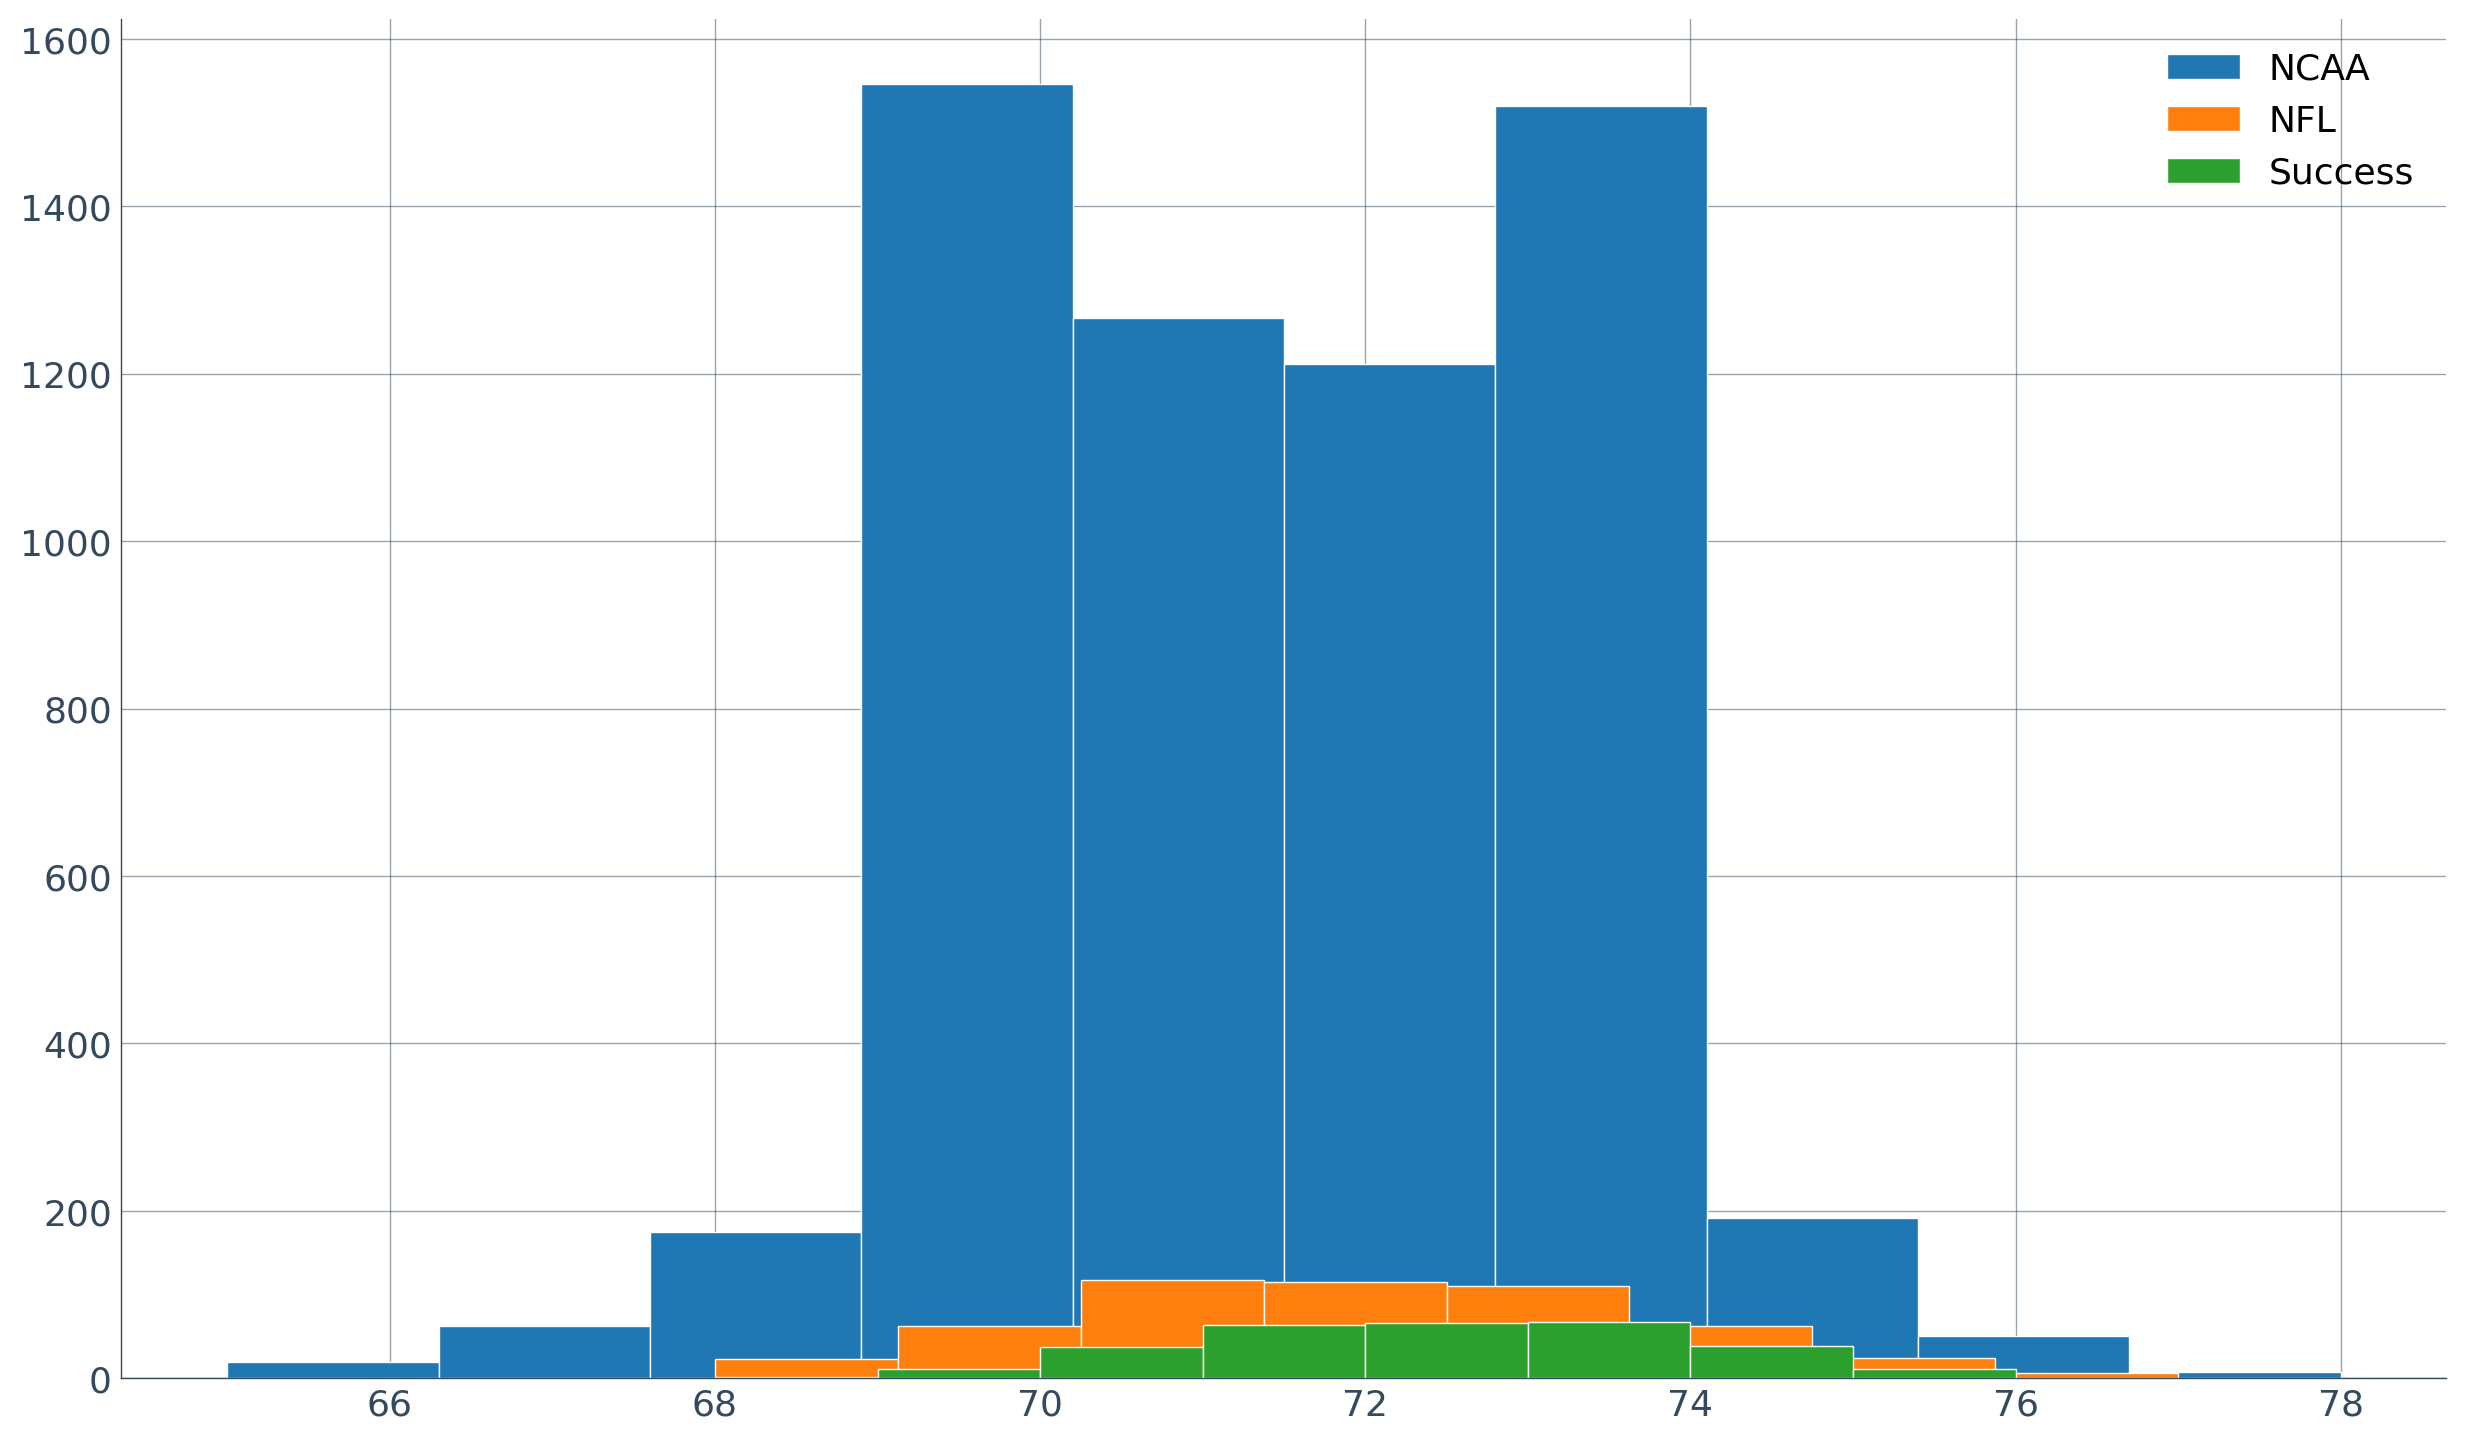

In [52]:
_ = plt.hist(df.height, bins = 10)
_ = plt.hist(nfl.height.dropna(), bins = 8)
_ = plt.hist(successes.height.dropna(), bins = 8)

plt.legend(['NCAA', 'NFL', 'Success']);

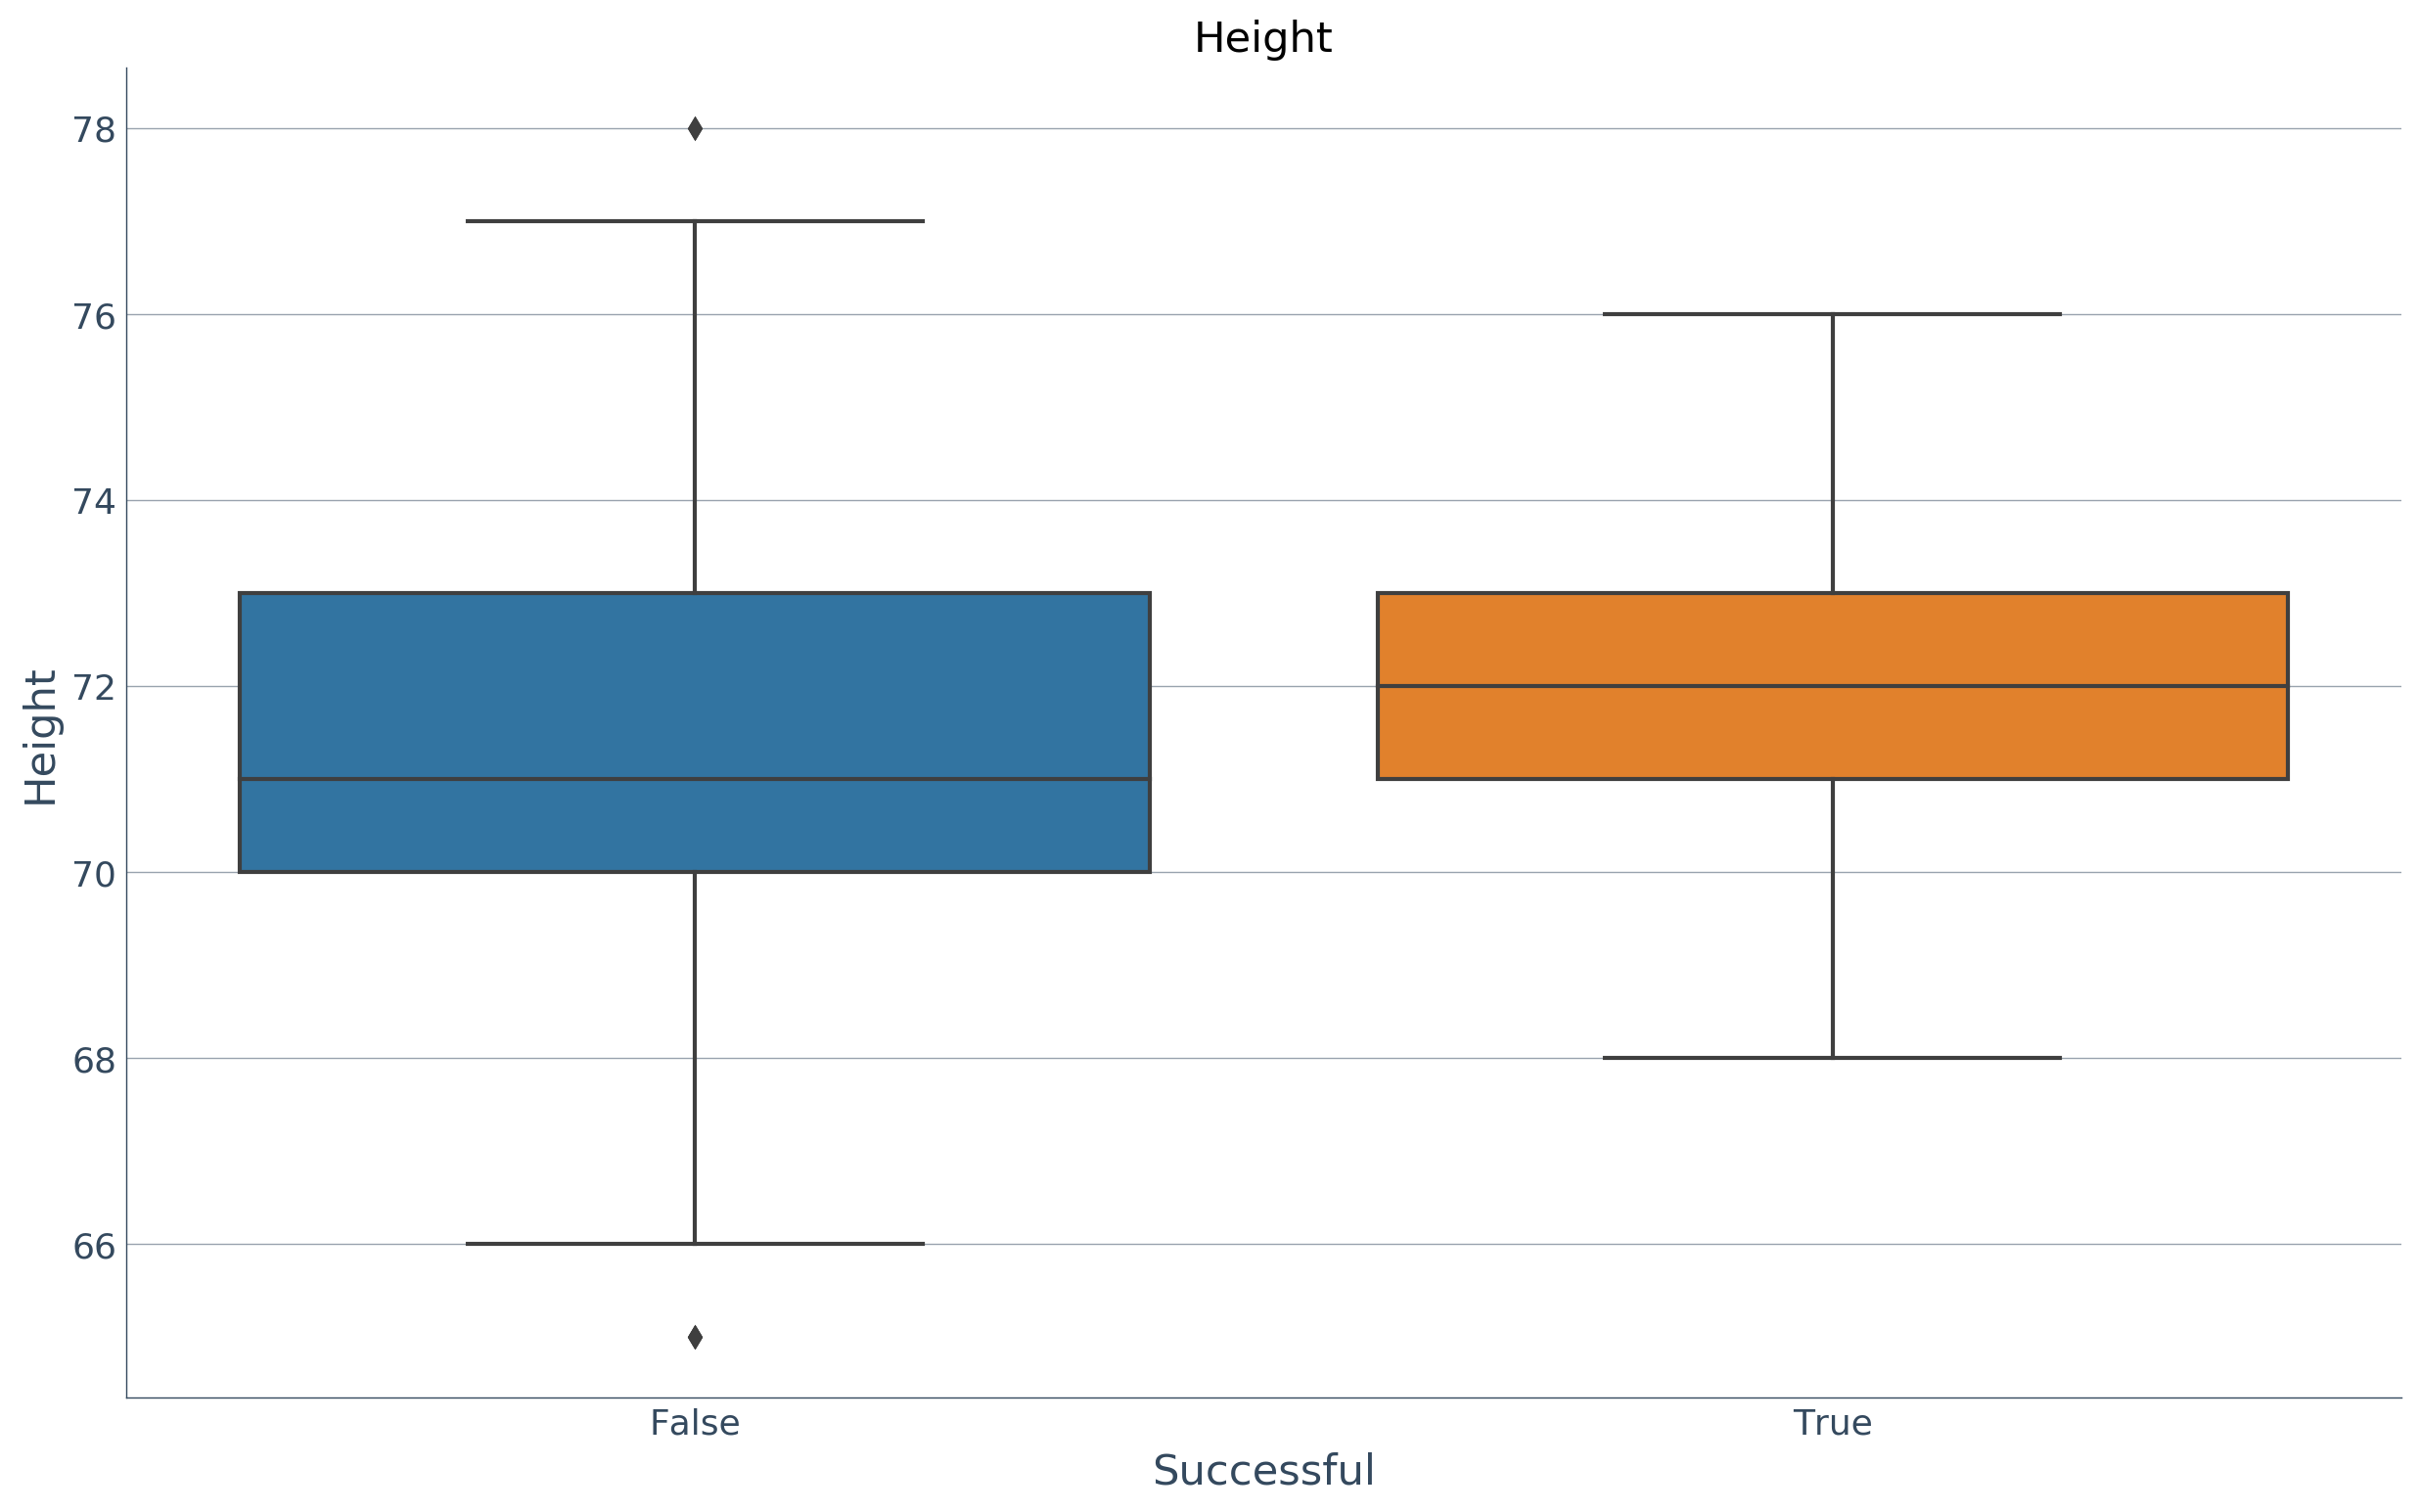

In [53]:
sns.boxplot(x='success', y='height', data=df)
plt.xlabel('Successful')
plt.ylabel('Height')
plt.title('Height');

### Weight

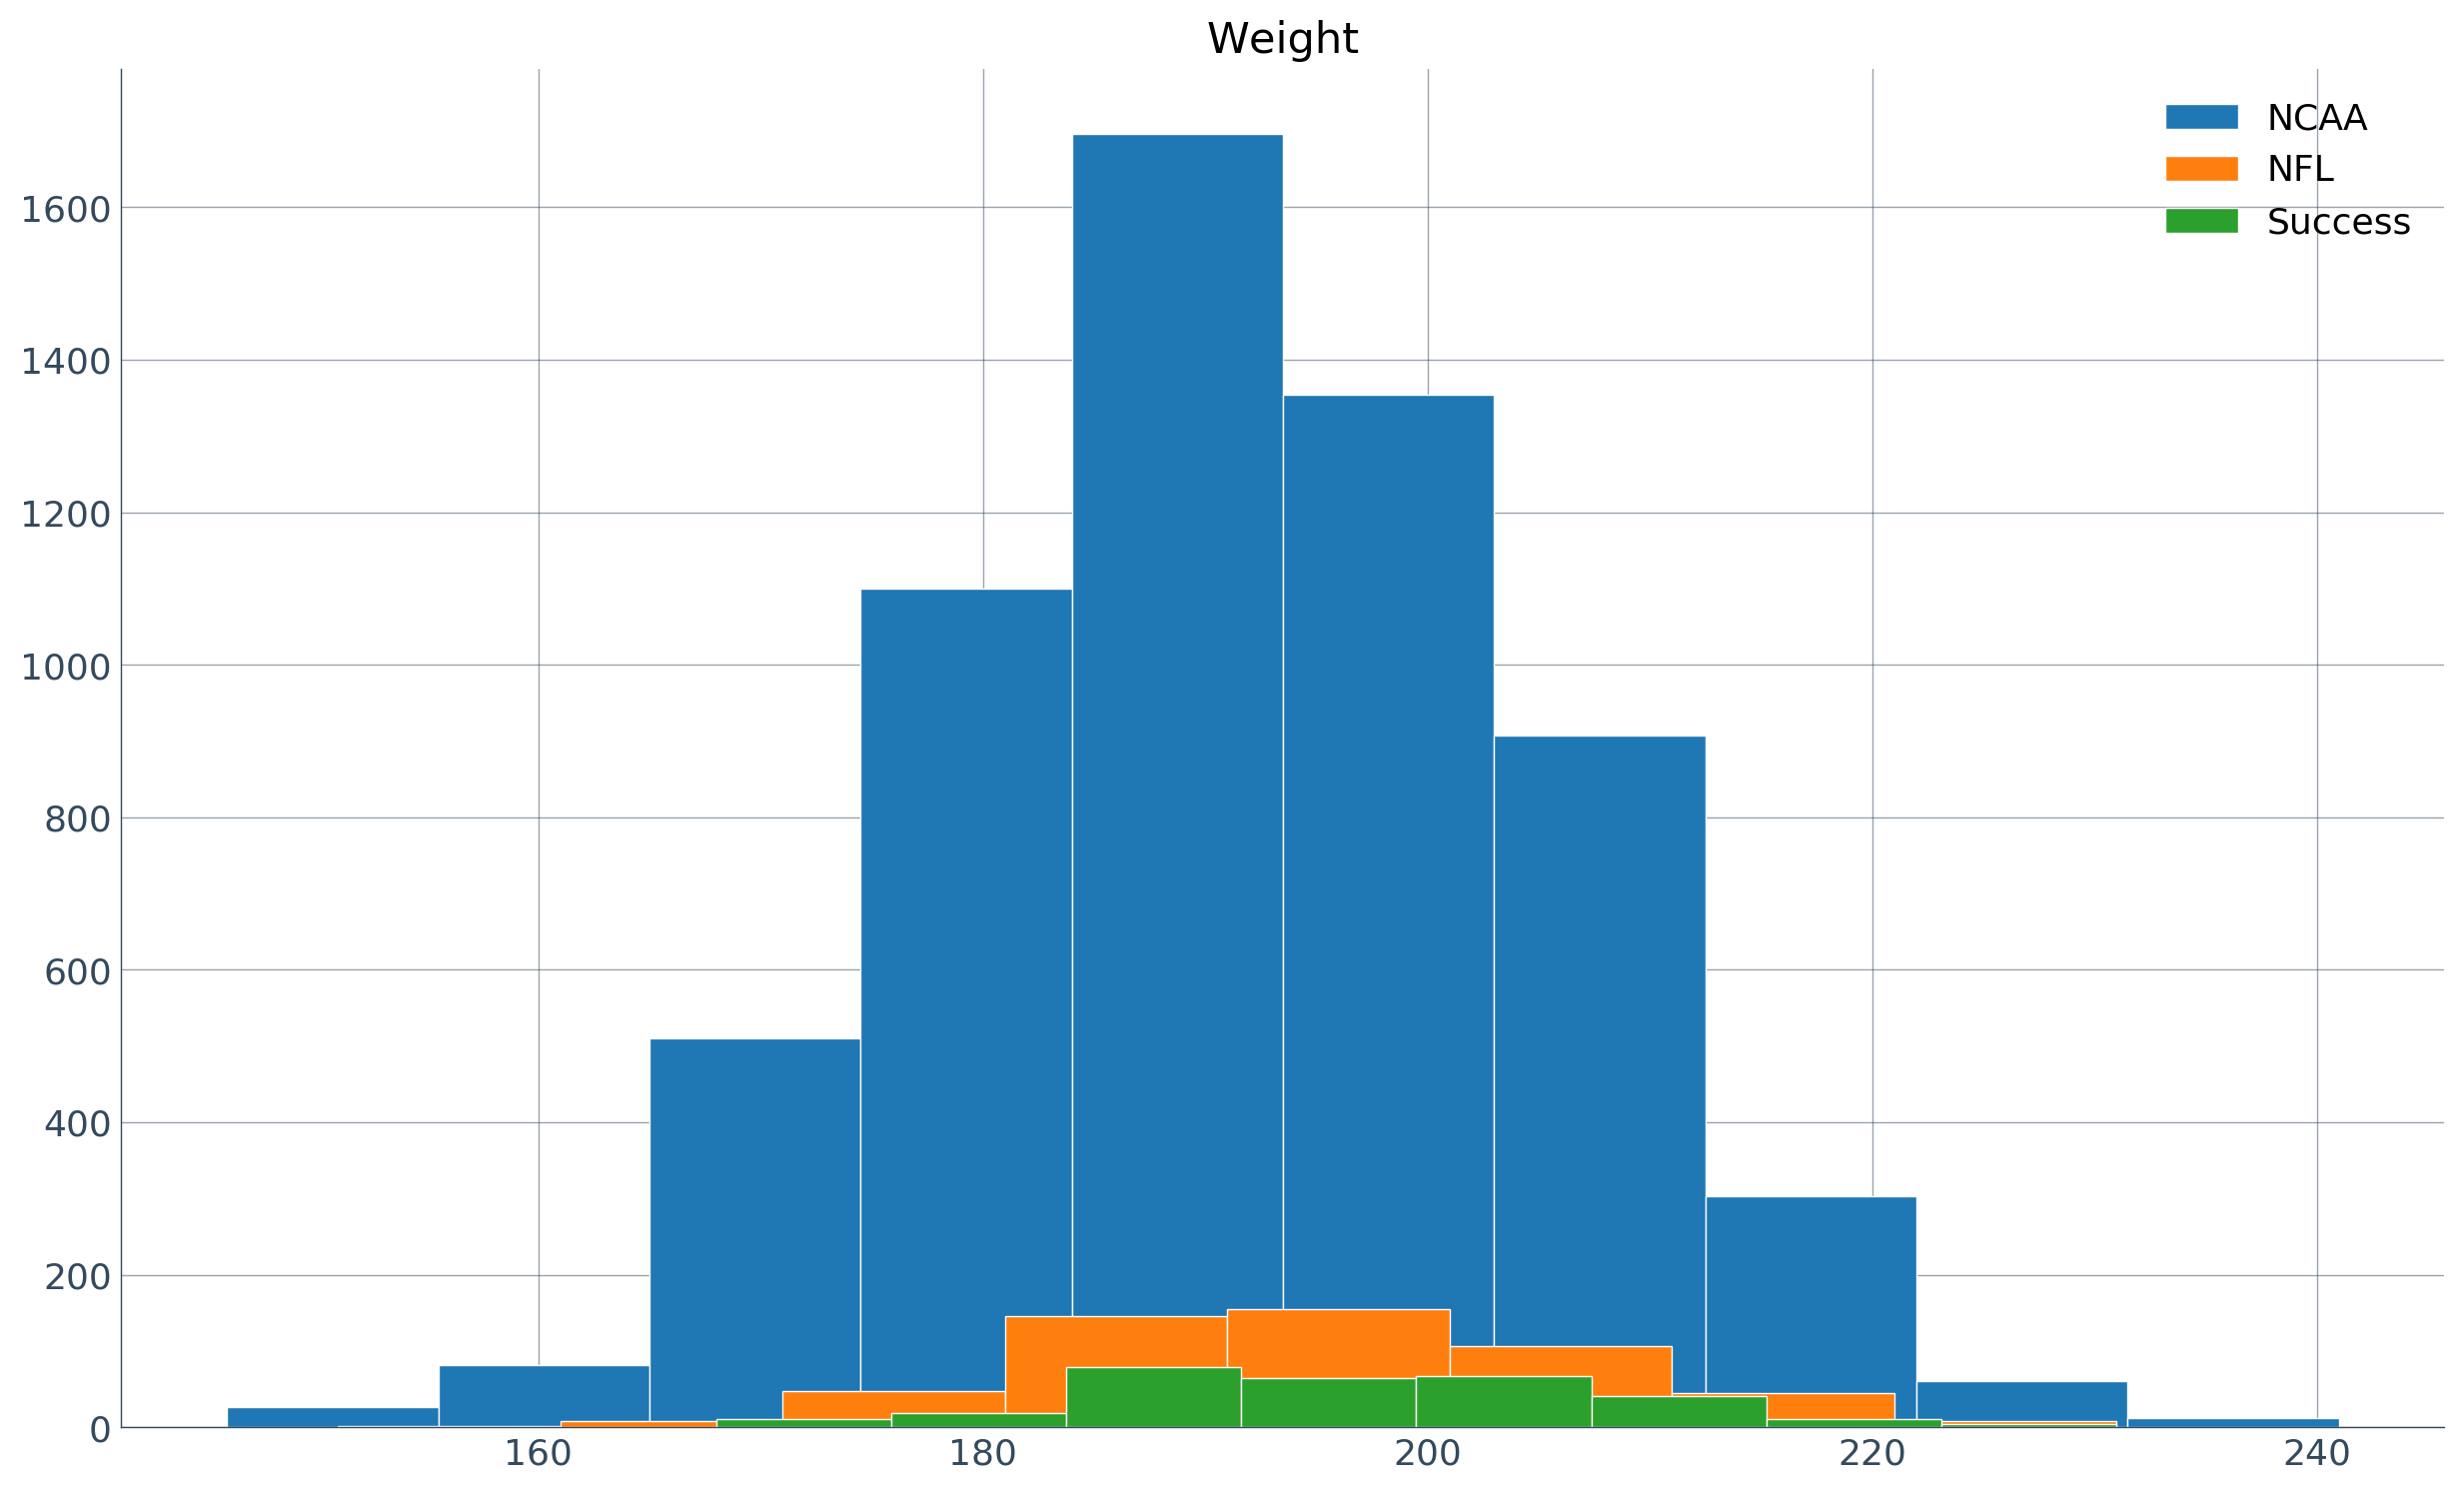

In [54]:
_ = plt.hist(df.weight, bins = 10)
_ = plt.hist(nfl.weight.dropna(), bins = 8)
_ = plt.hist(successes.weight.dropna(), bins = 8)

plt.title('Weight')
plt.legend(['NCAA', 'NFL', 'Success']);

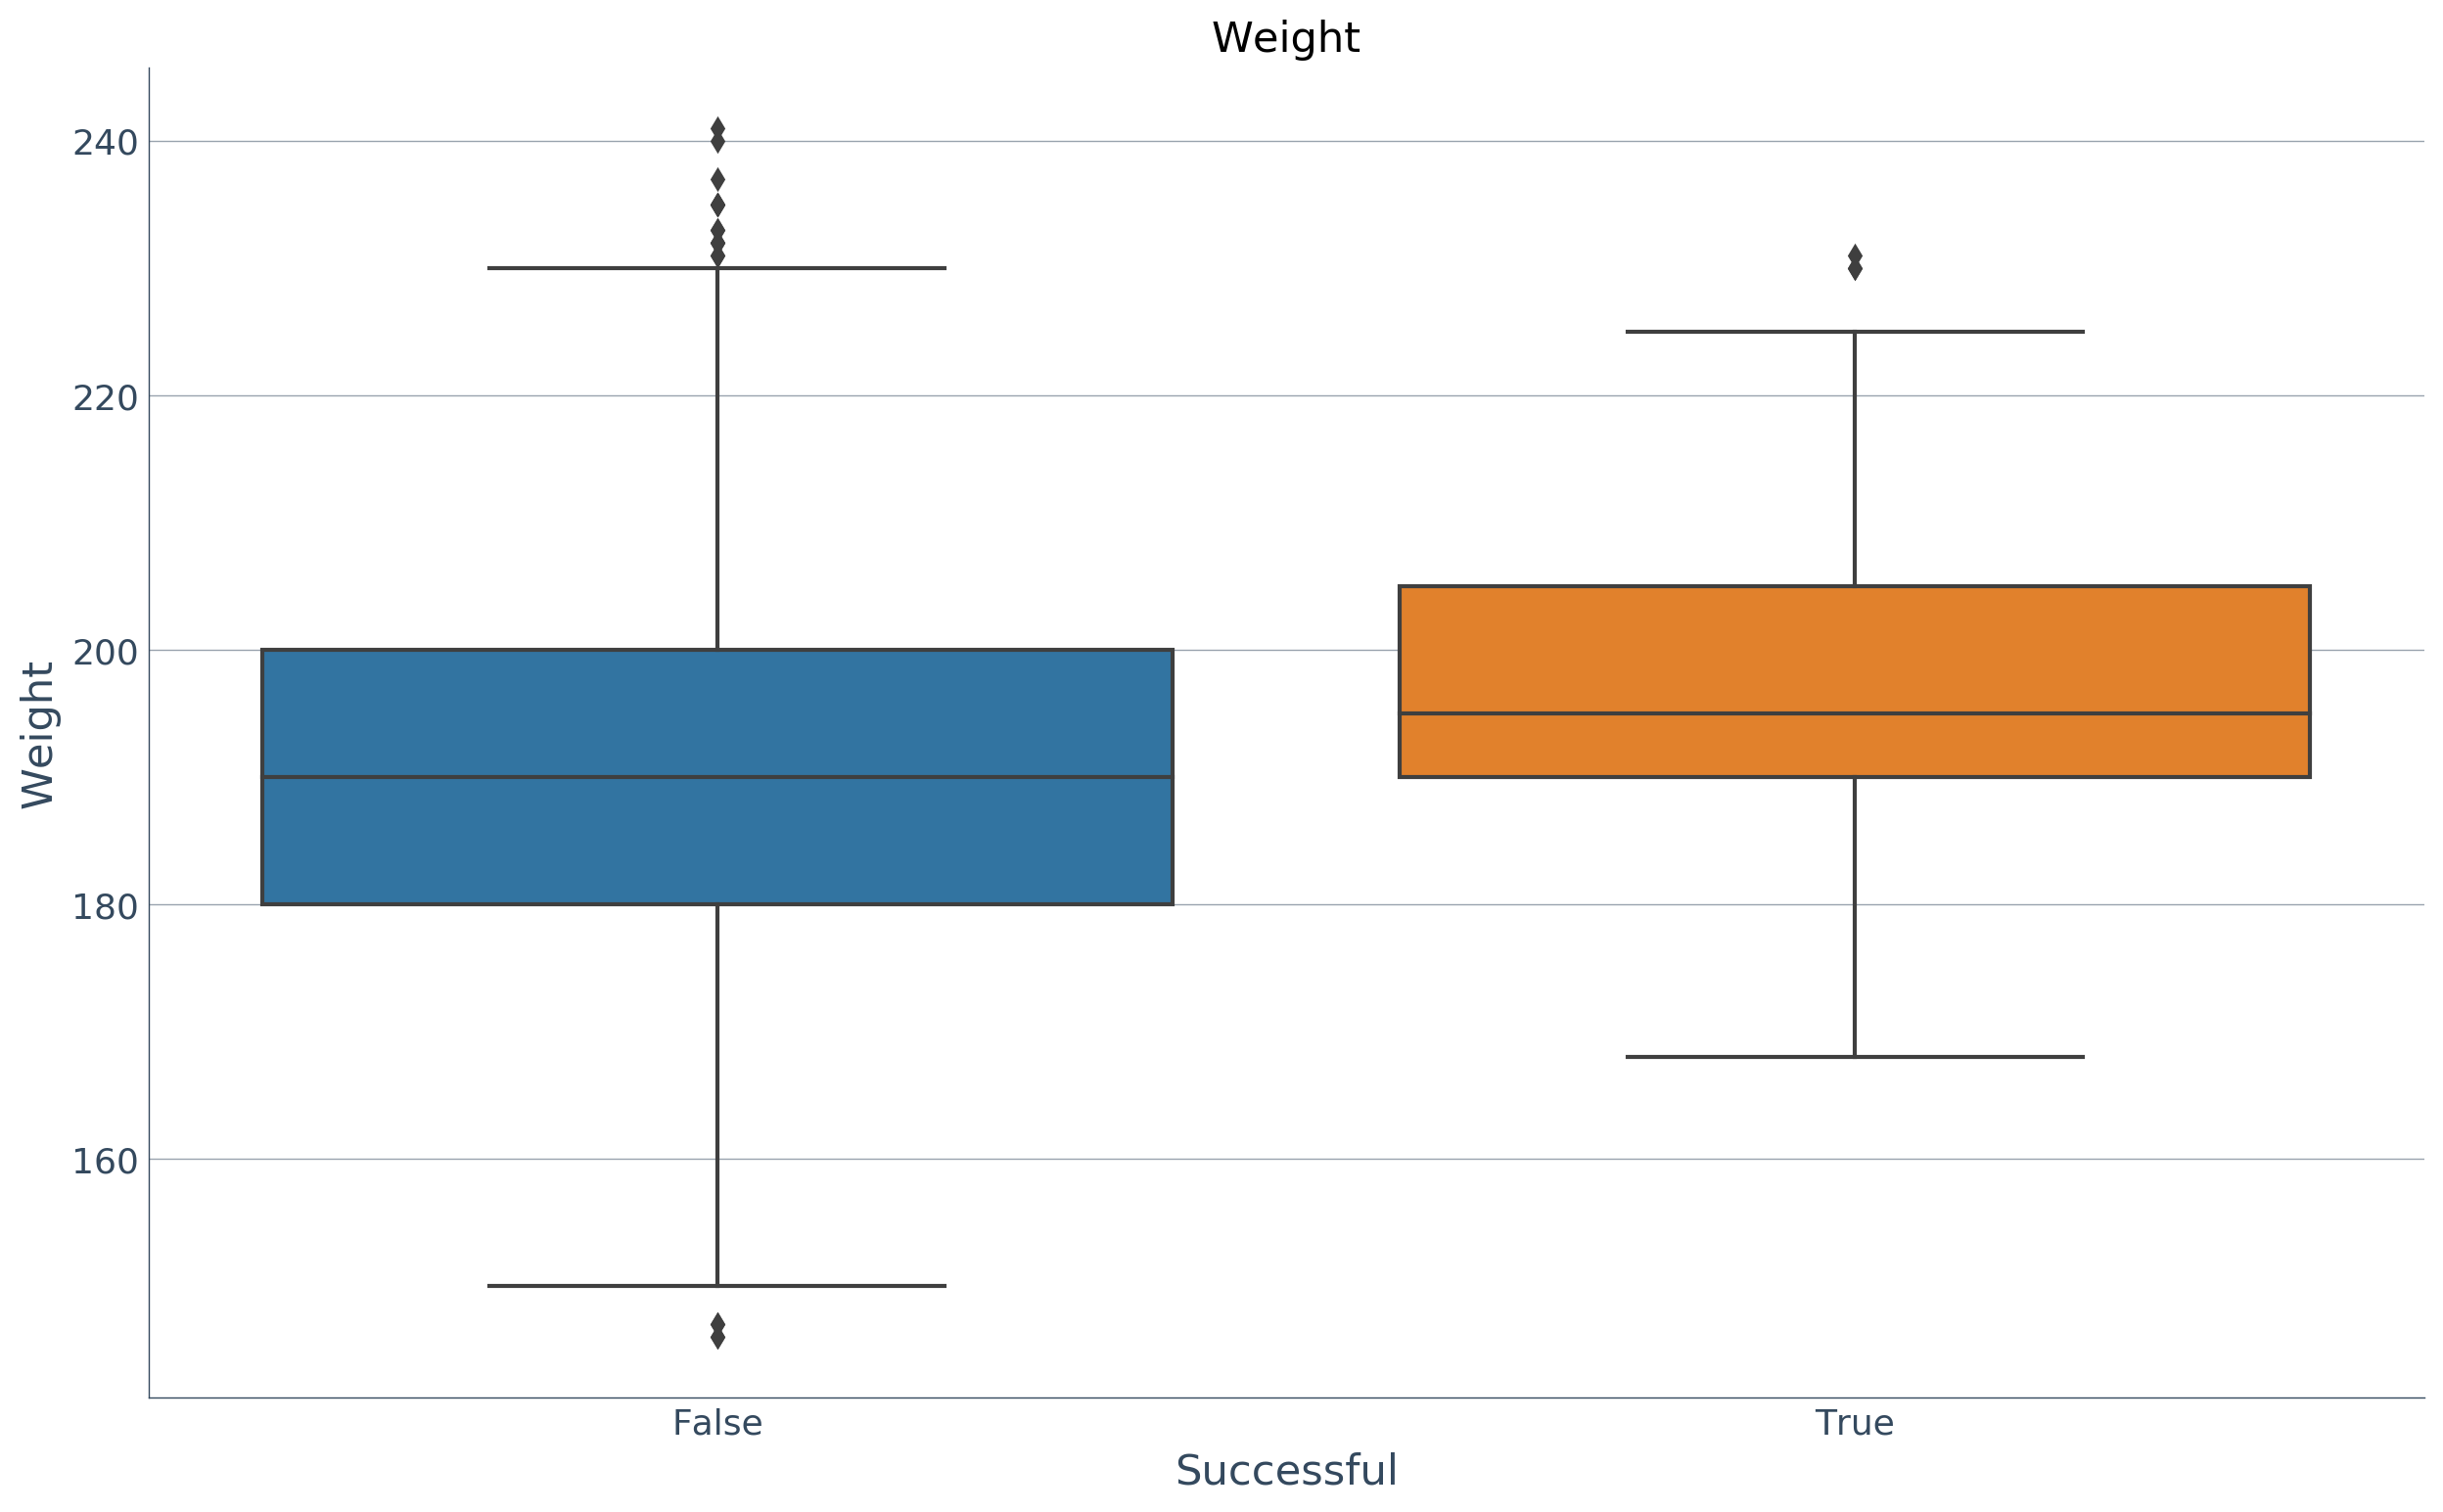

In [55]:
sns.boxplot(x='success', y='weight', data=df)
plt.xlabel('Successful')
plt.ylabel('Weight')
plt.title('Weight');

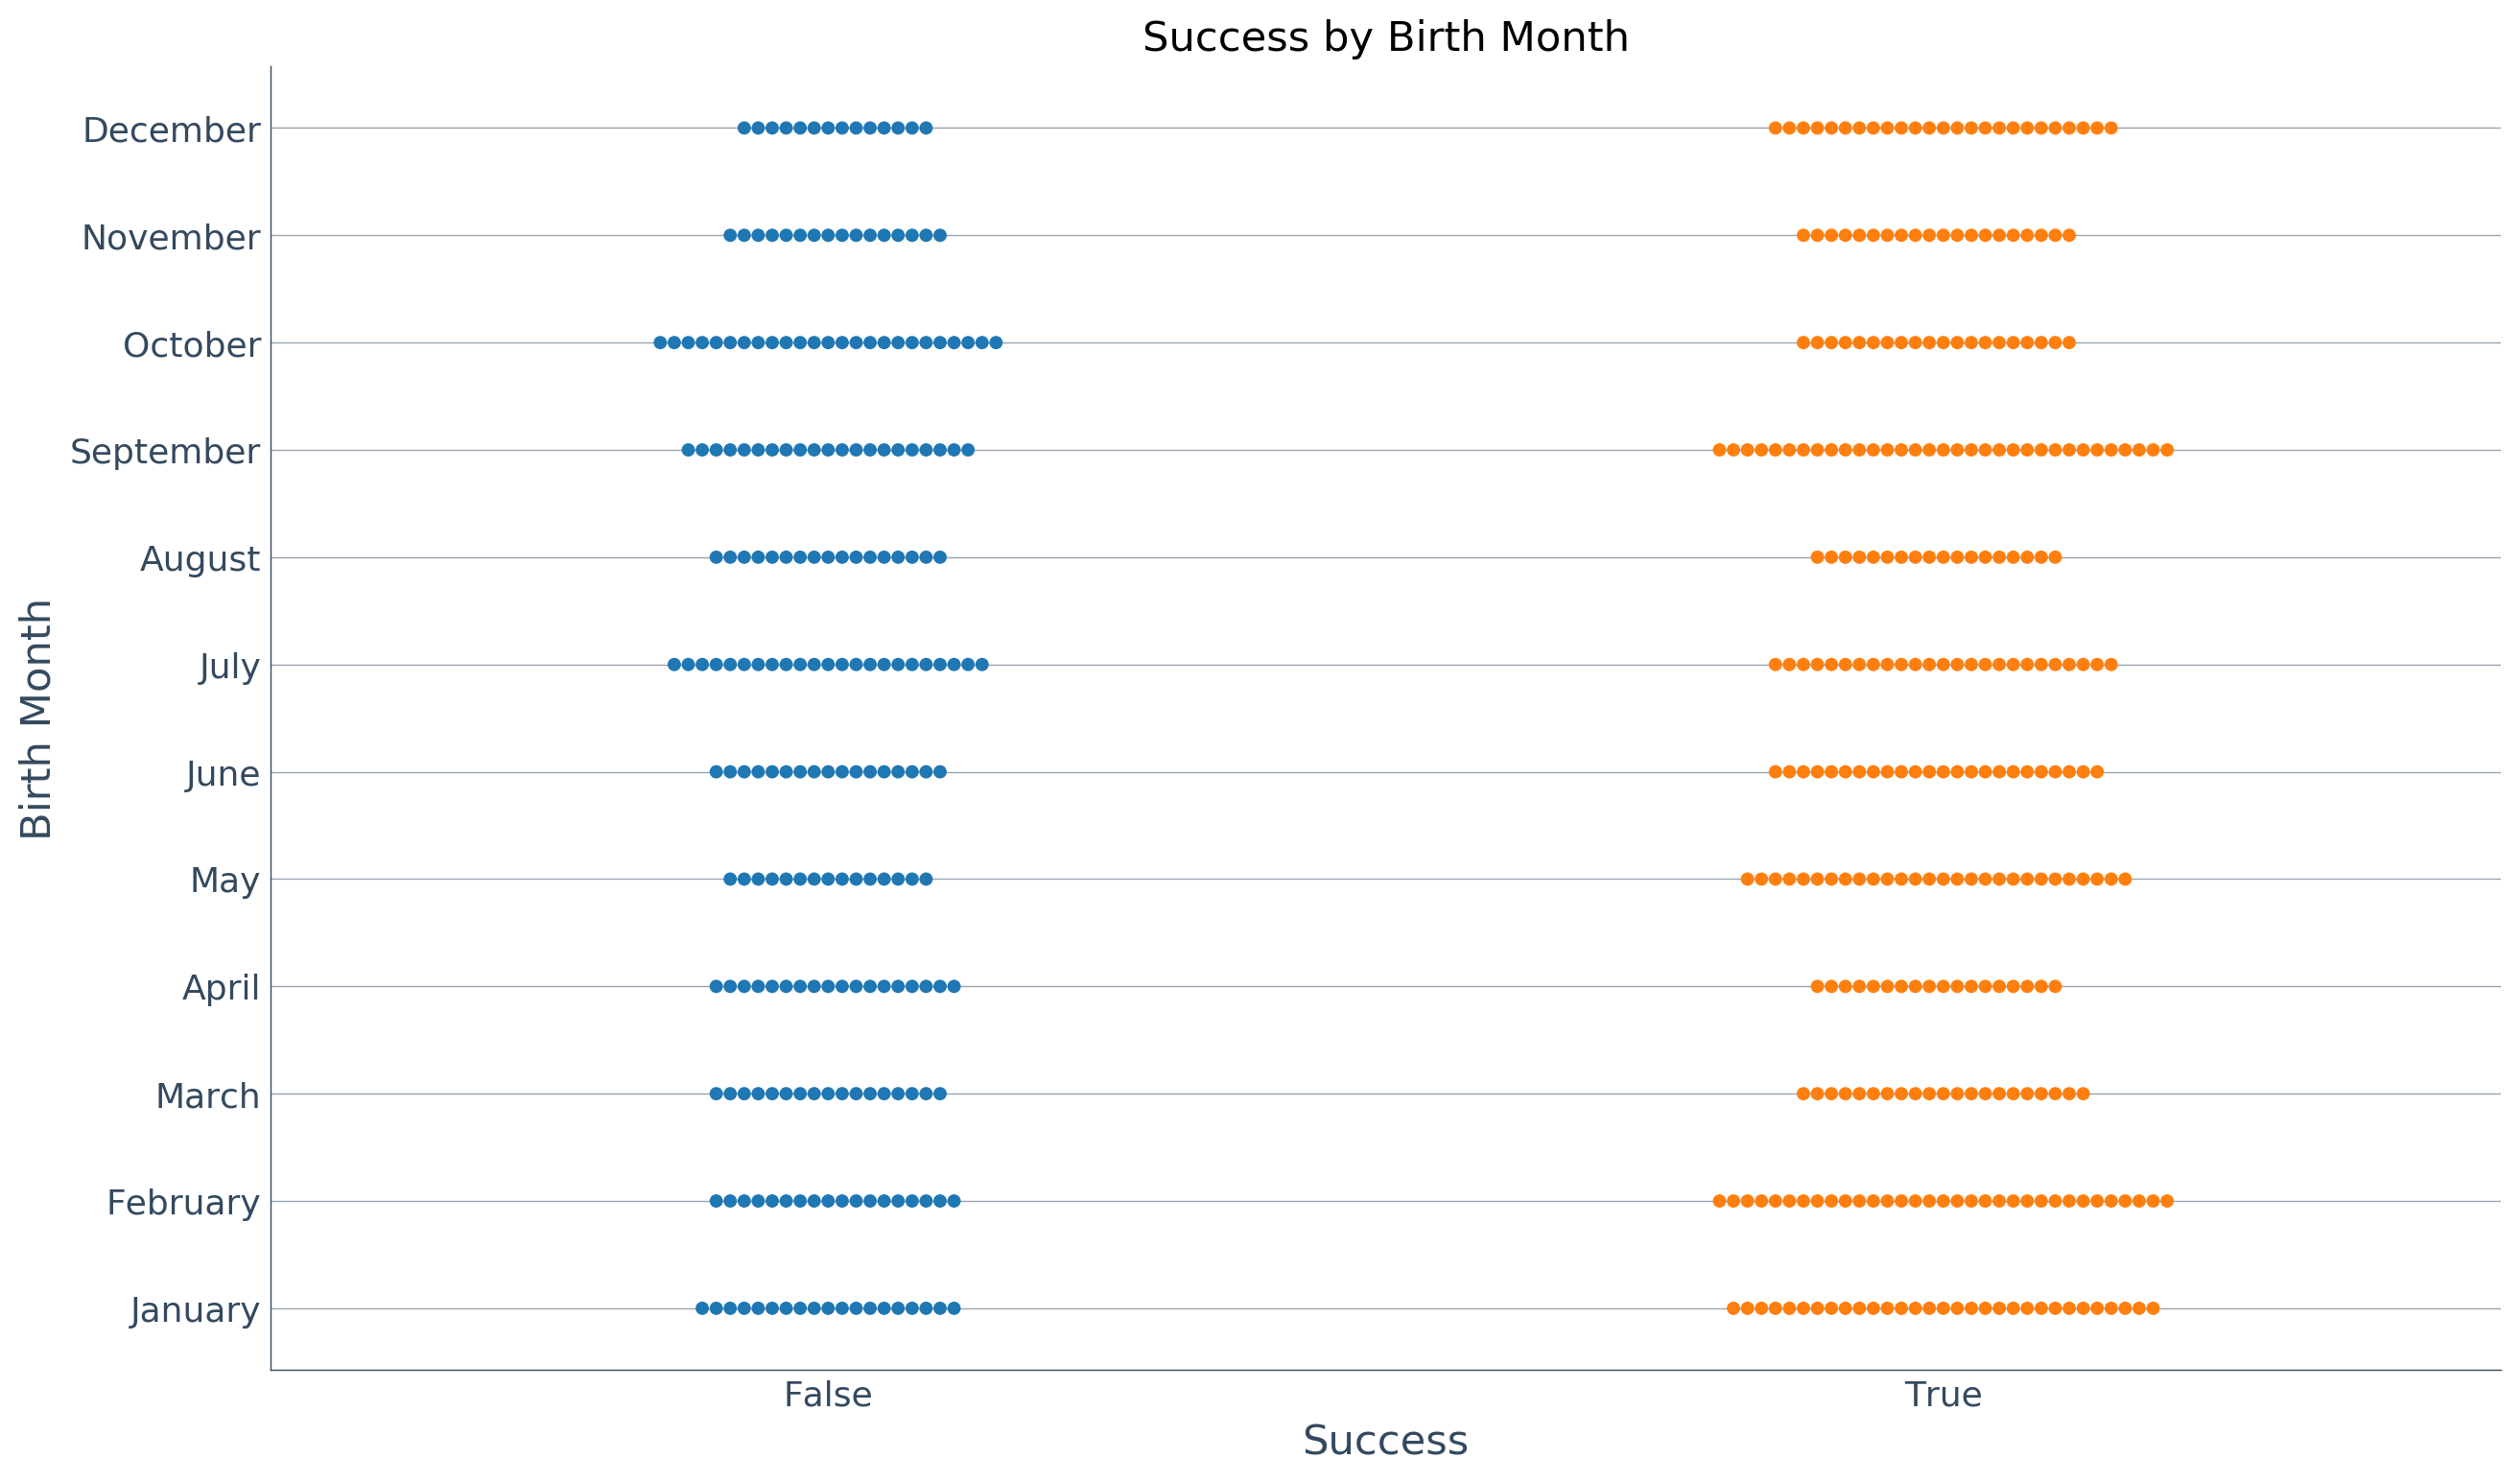

In [56]:
import calendar

sns.swarmplot(x='success', y='birth_month', data=df)

plt.xlabel('Success')
plt.ylabel('Birth Month')
plt.yticks(np.arange(1,13), calendar.month_name[1:13])
plt.title('Success by Birth Month');

### Home State

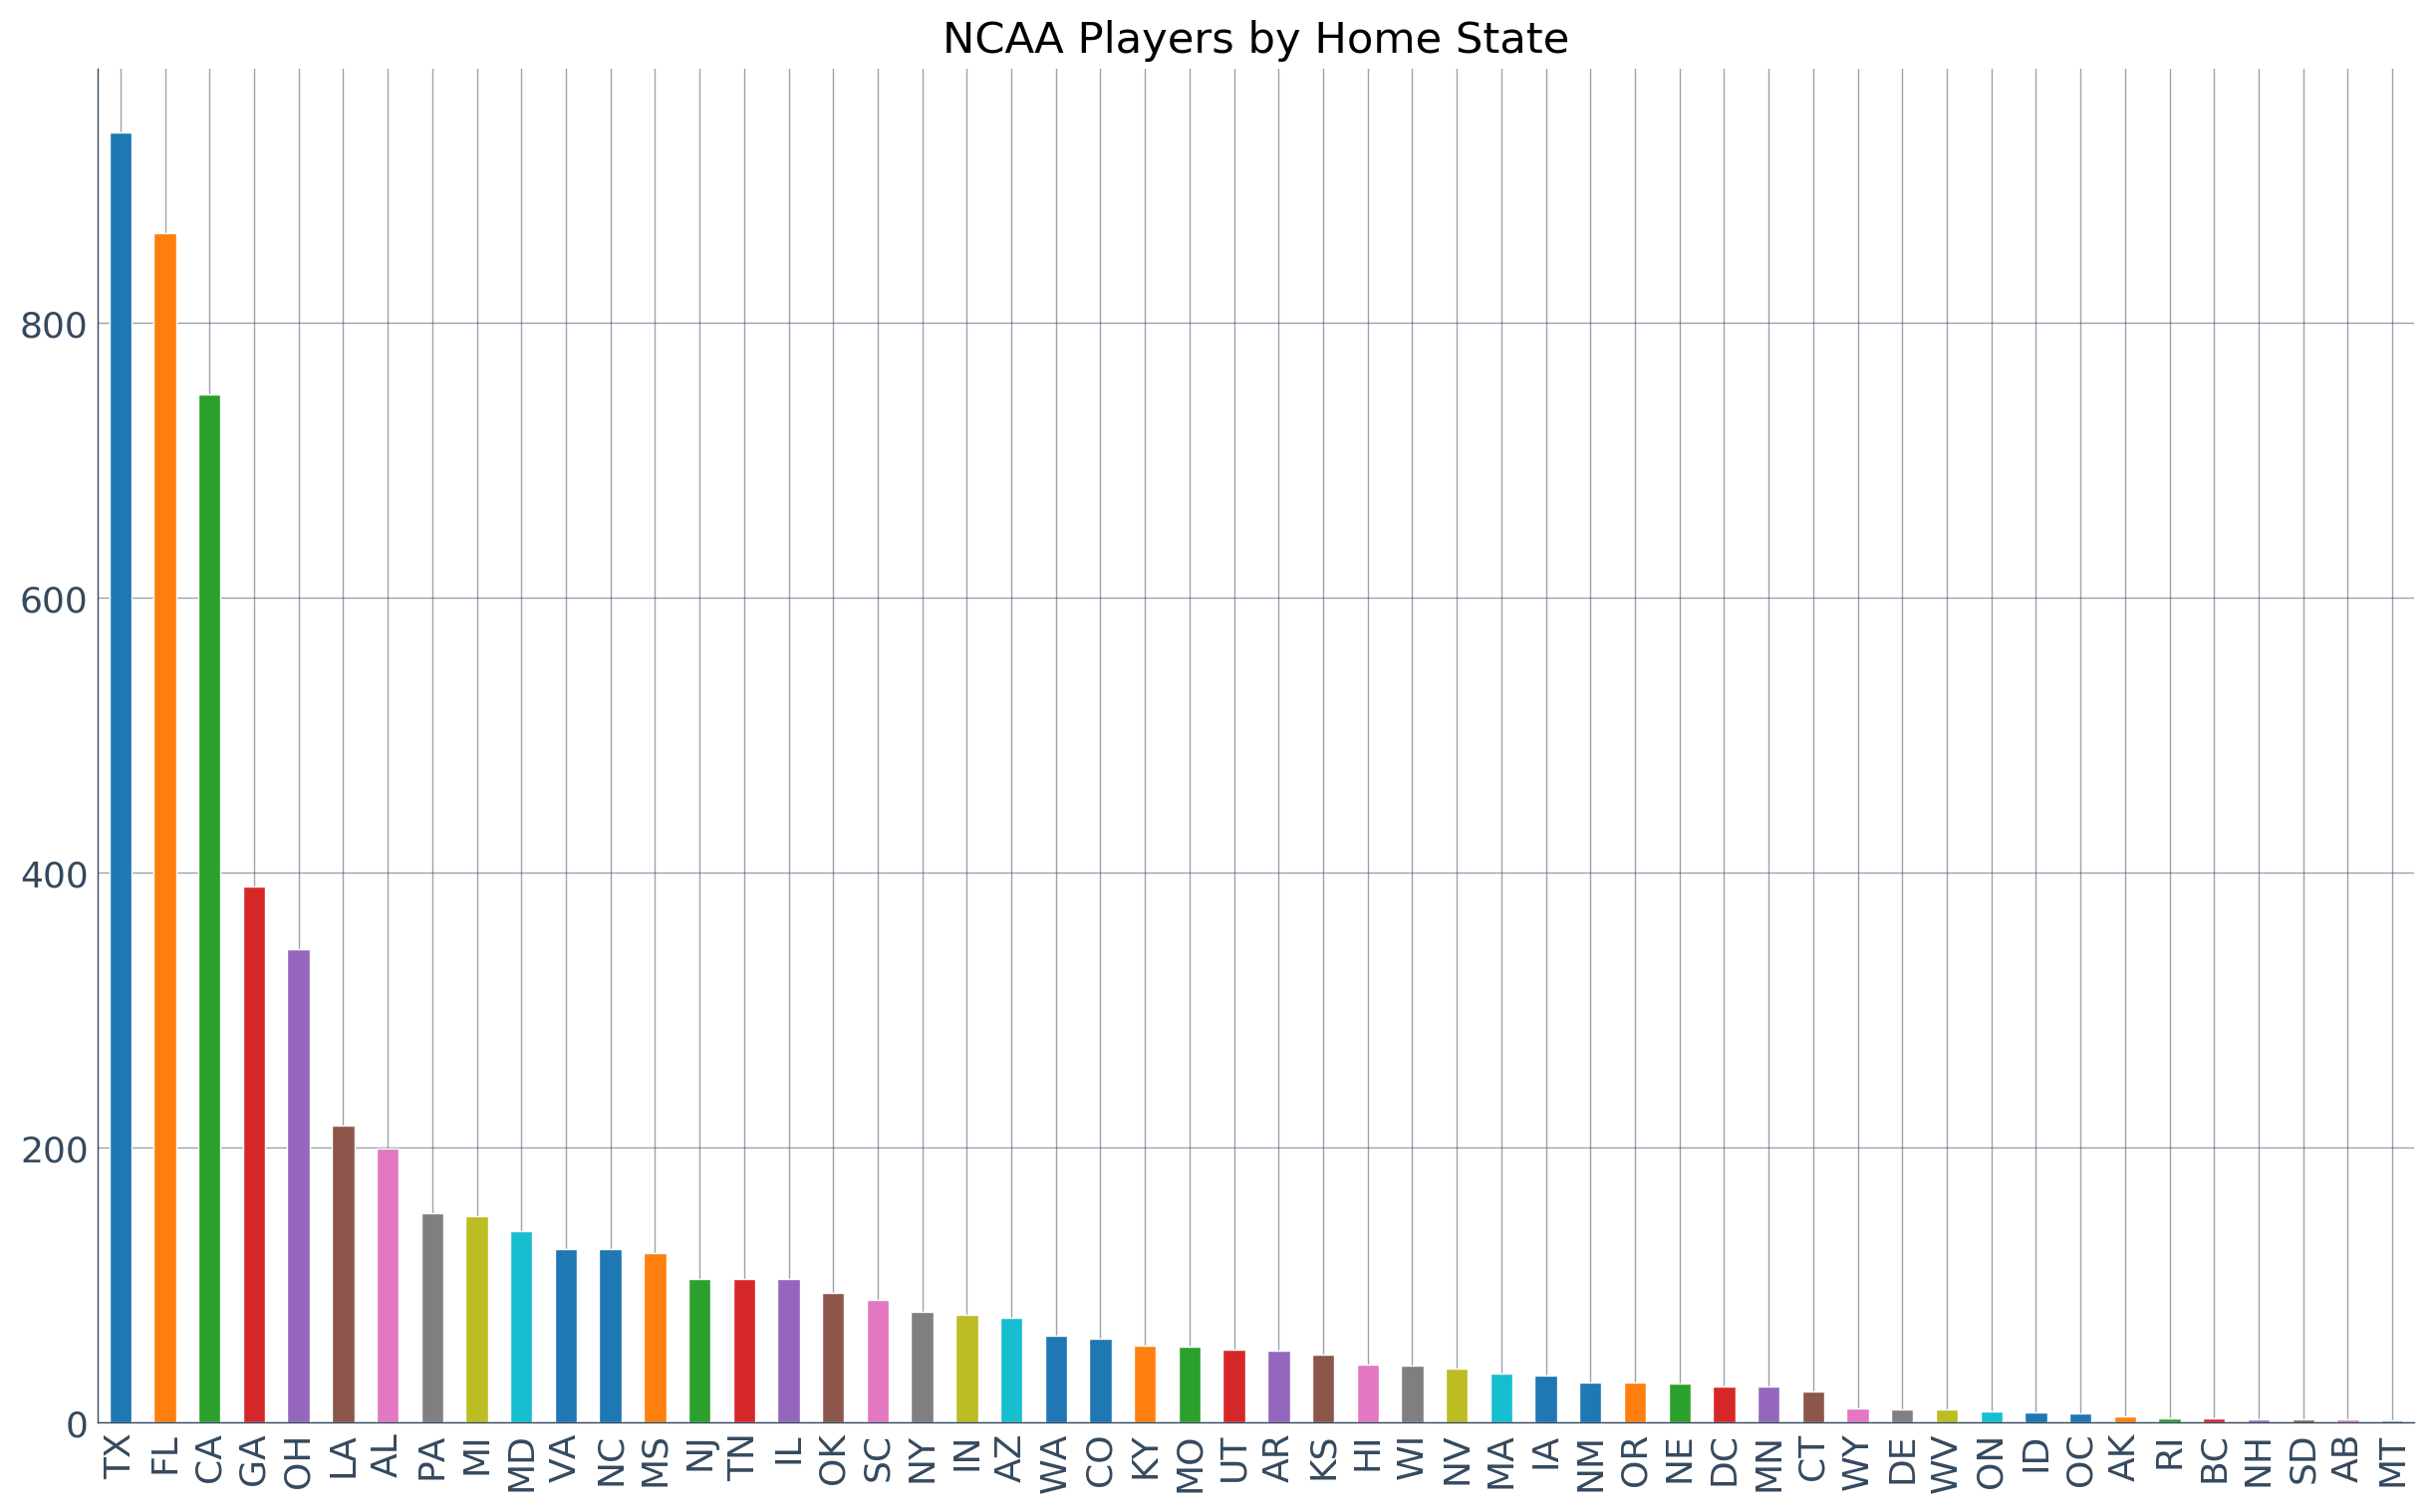

In [57]:
df.home_state.value_counts().plot(kind = 'bar')
plt.title('NCAA Players by Home State');

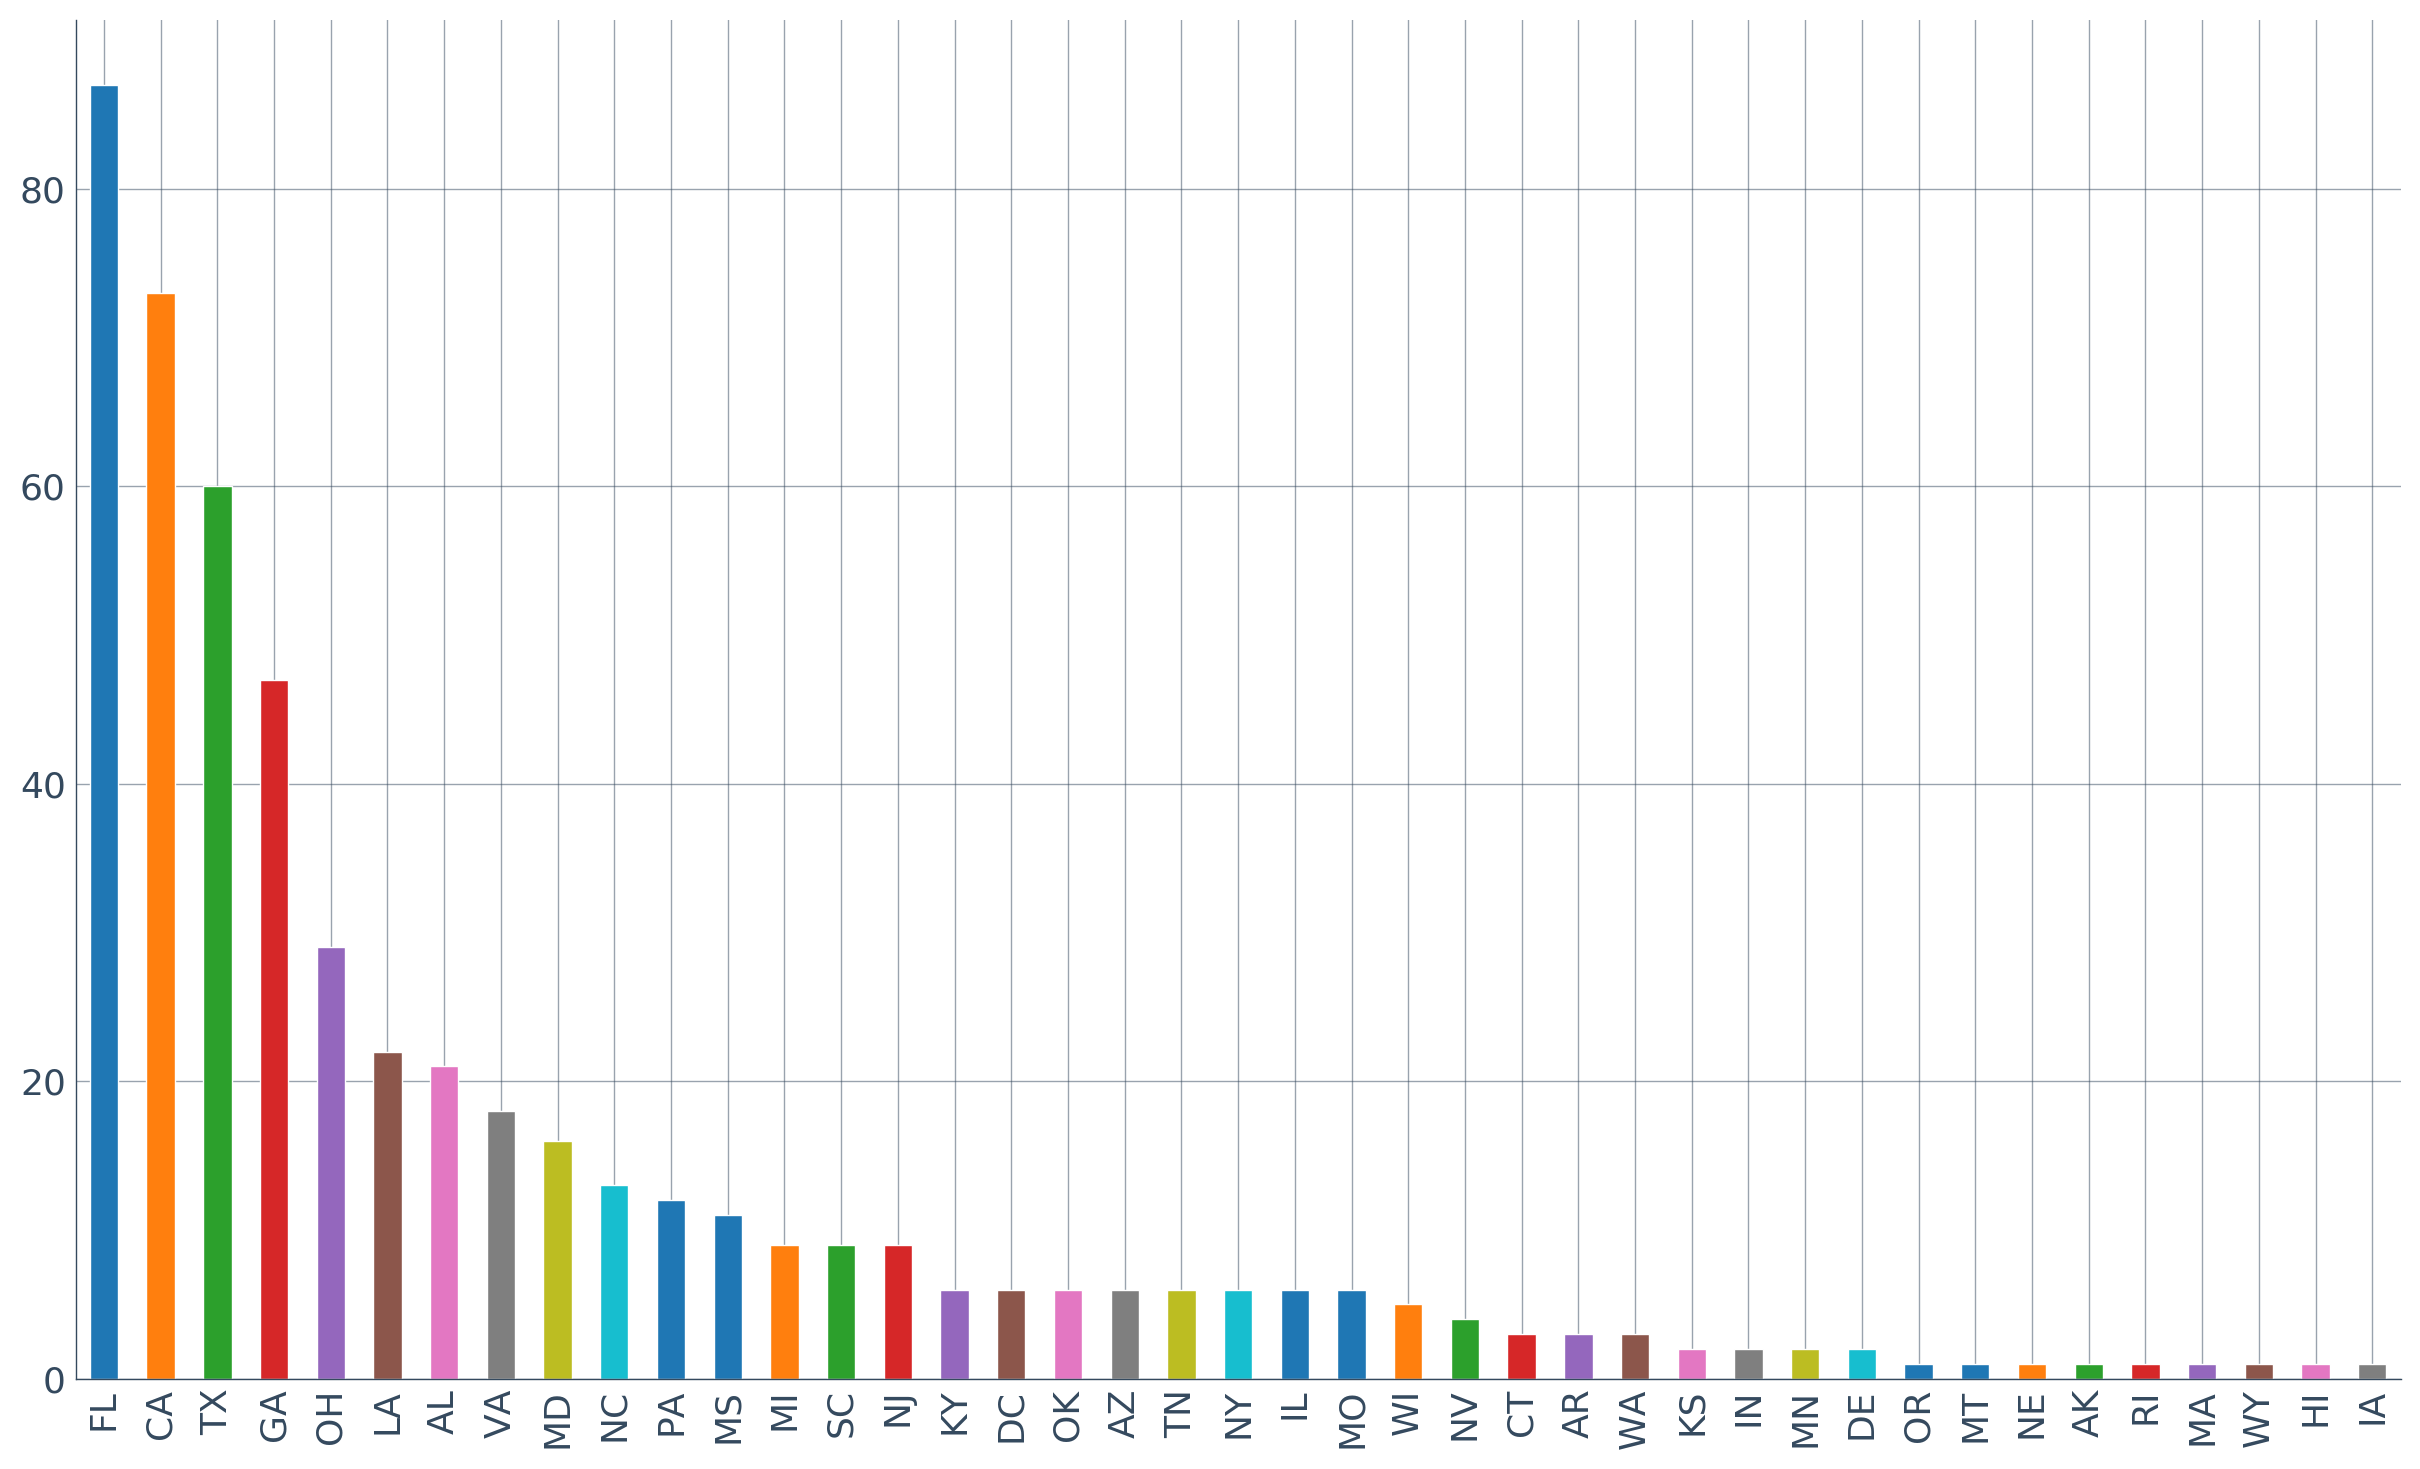

In [58]:
nfl.home_state.value_counts().plot(kind = 'bar');

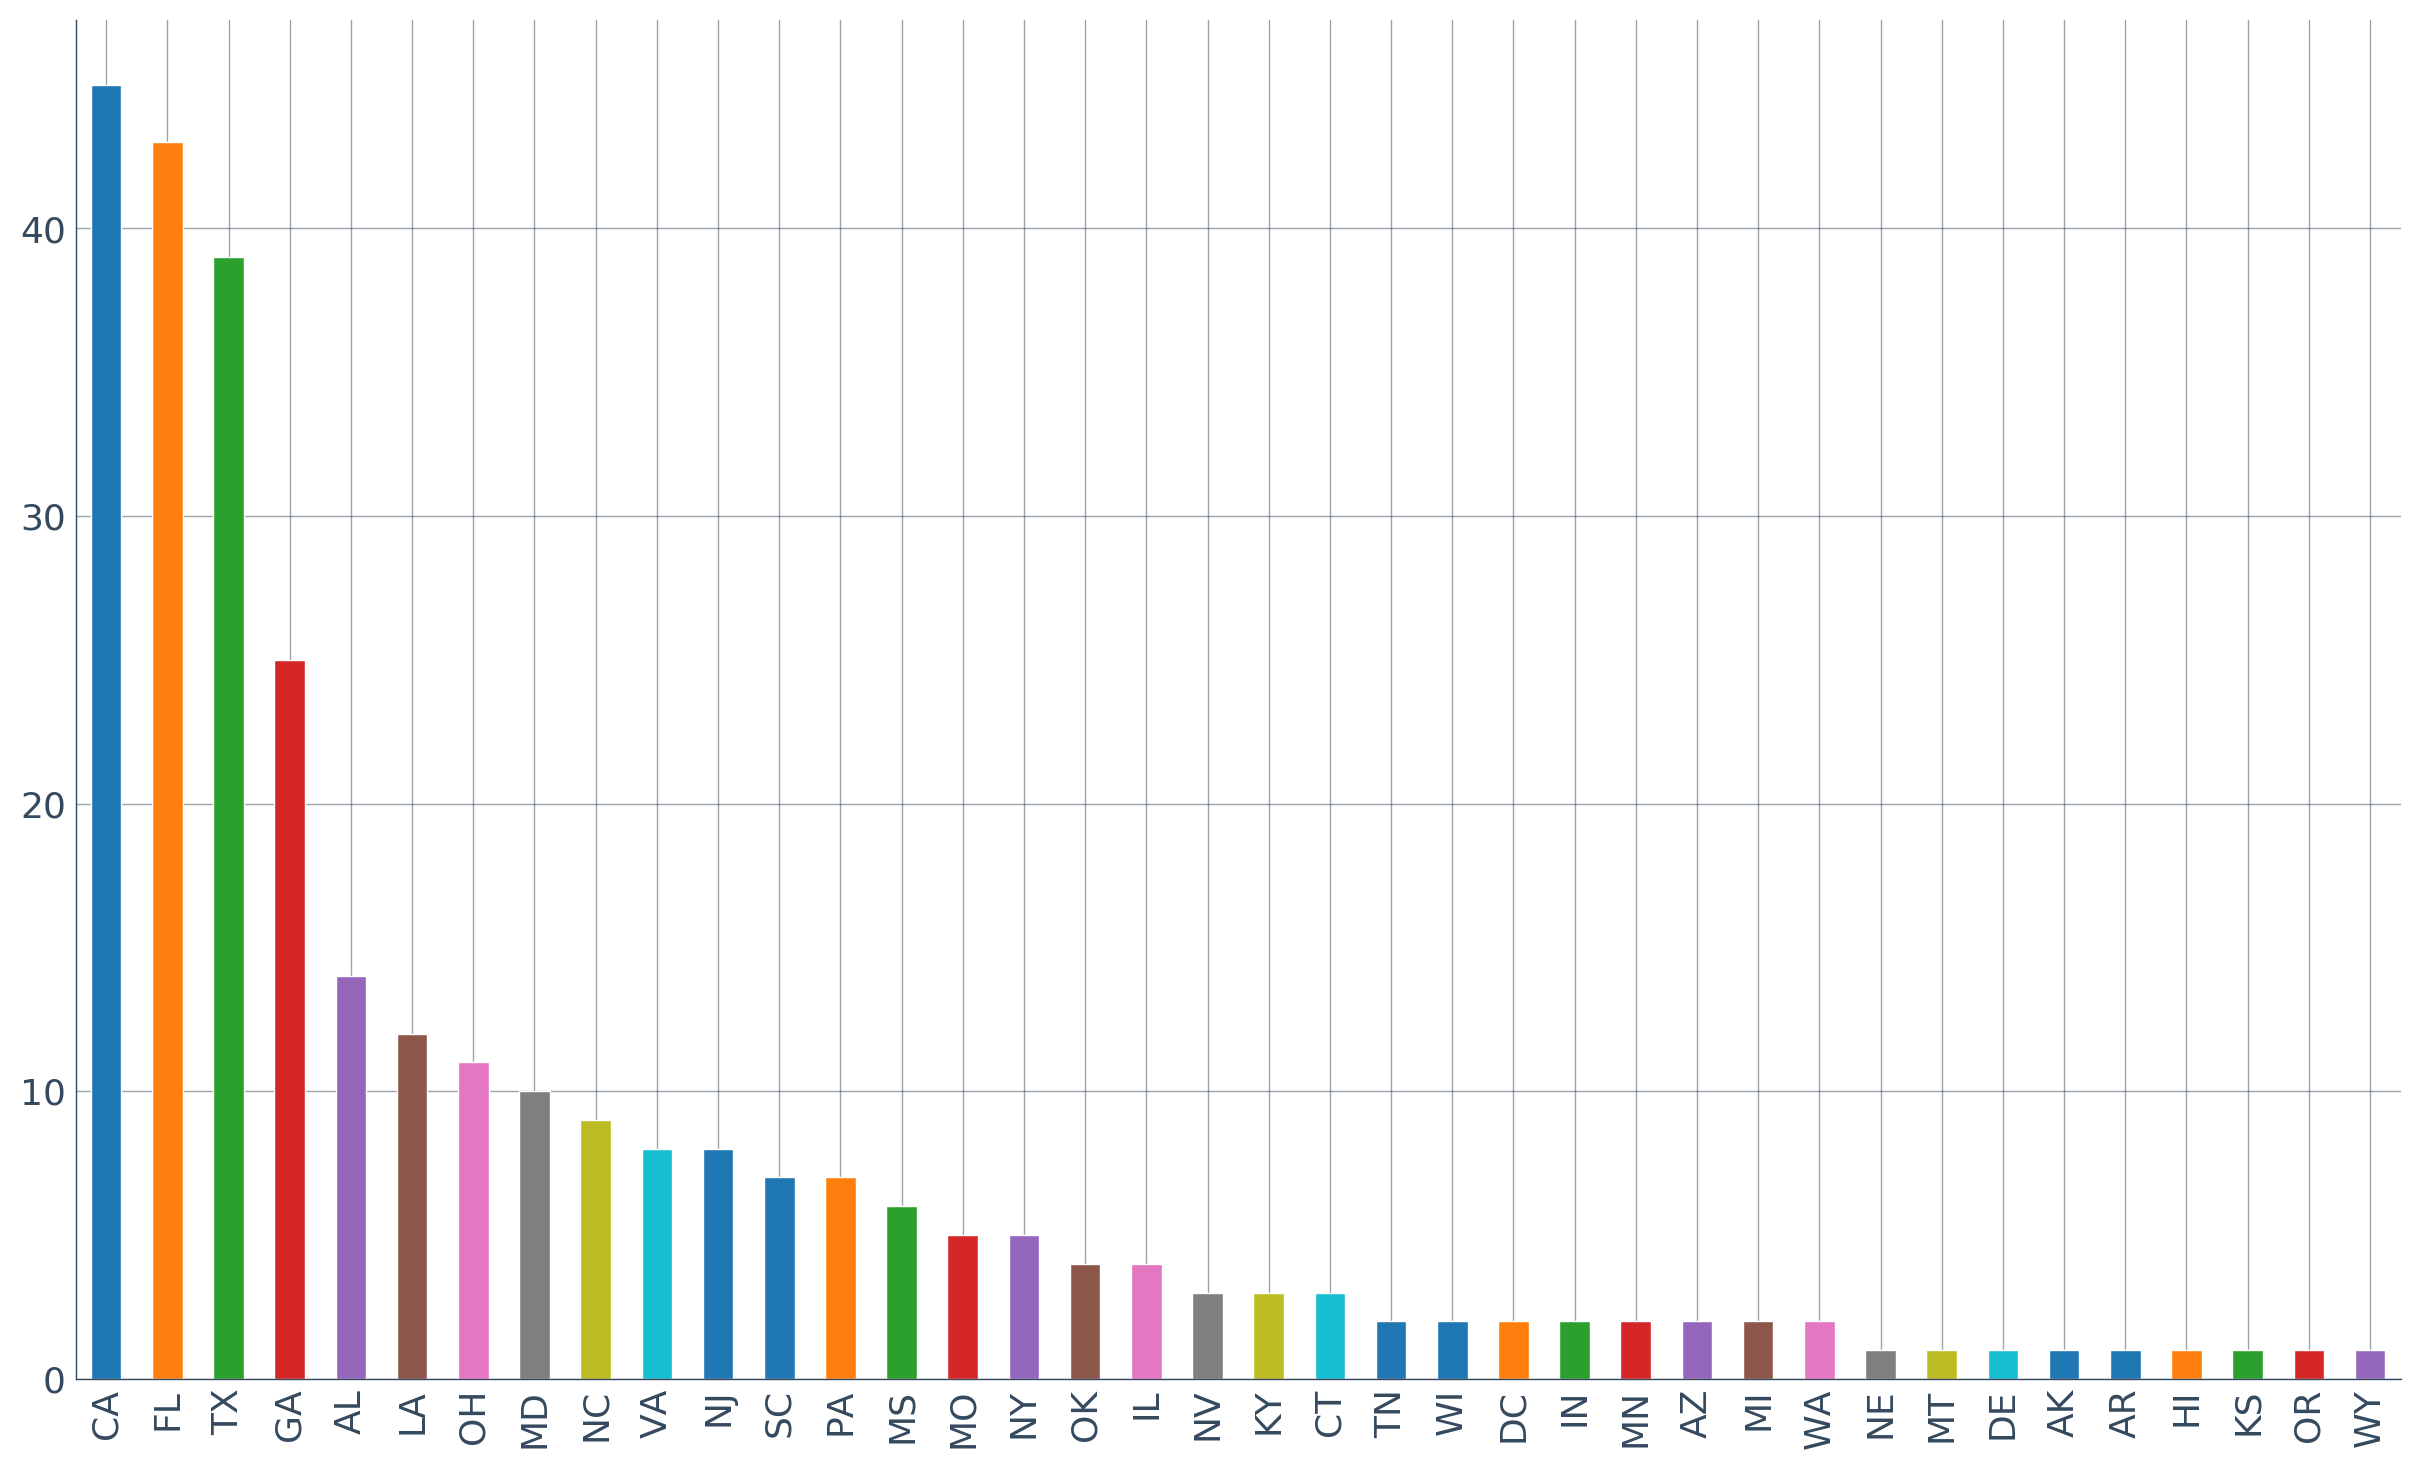

In [59]:
successes.home_state.value_counts().plot(kind = 'bar');

### Team

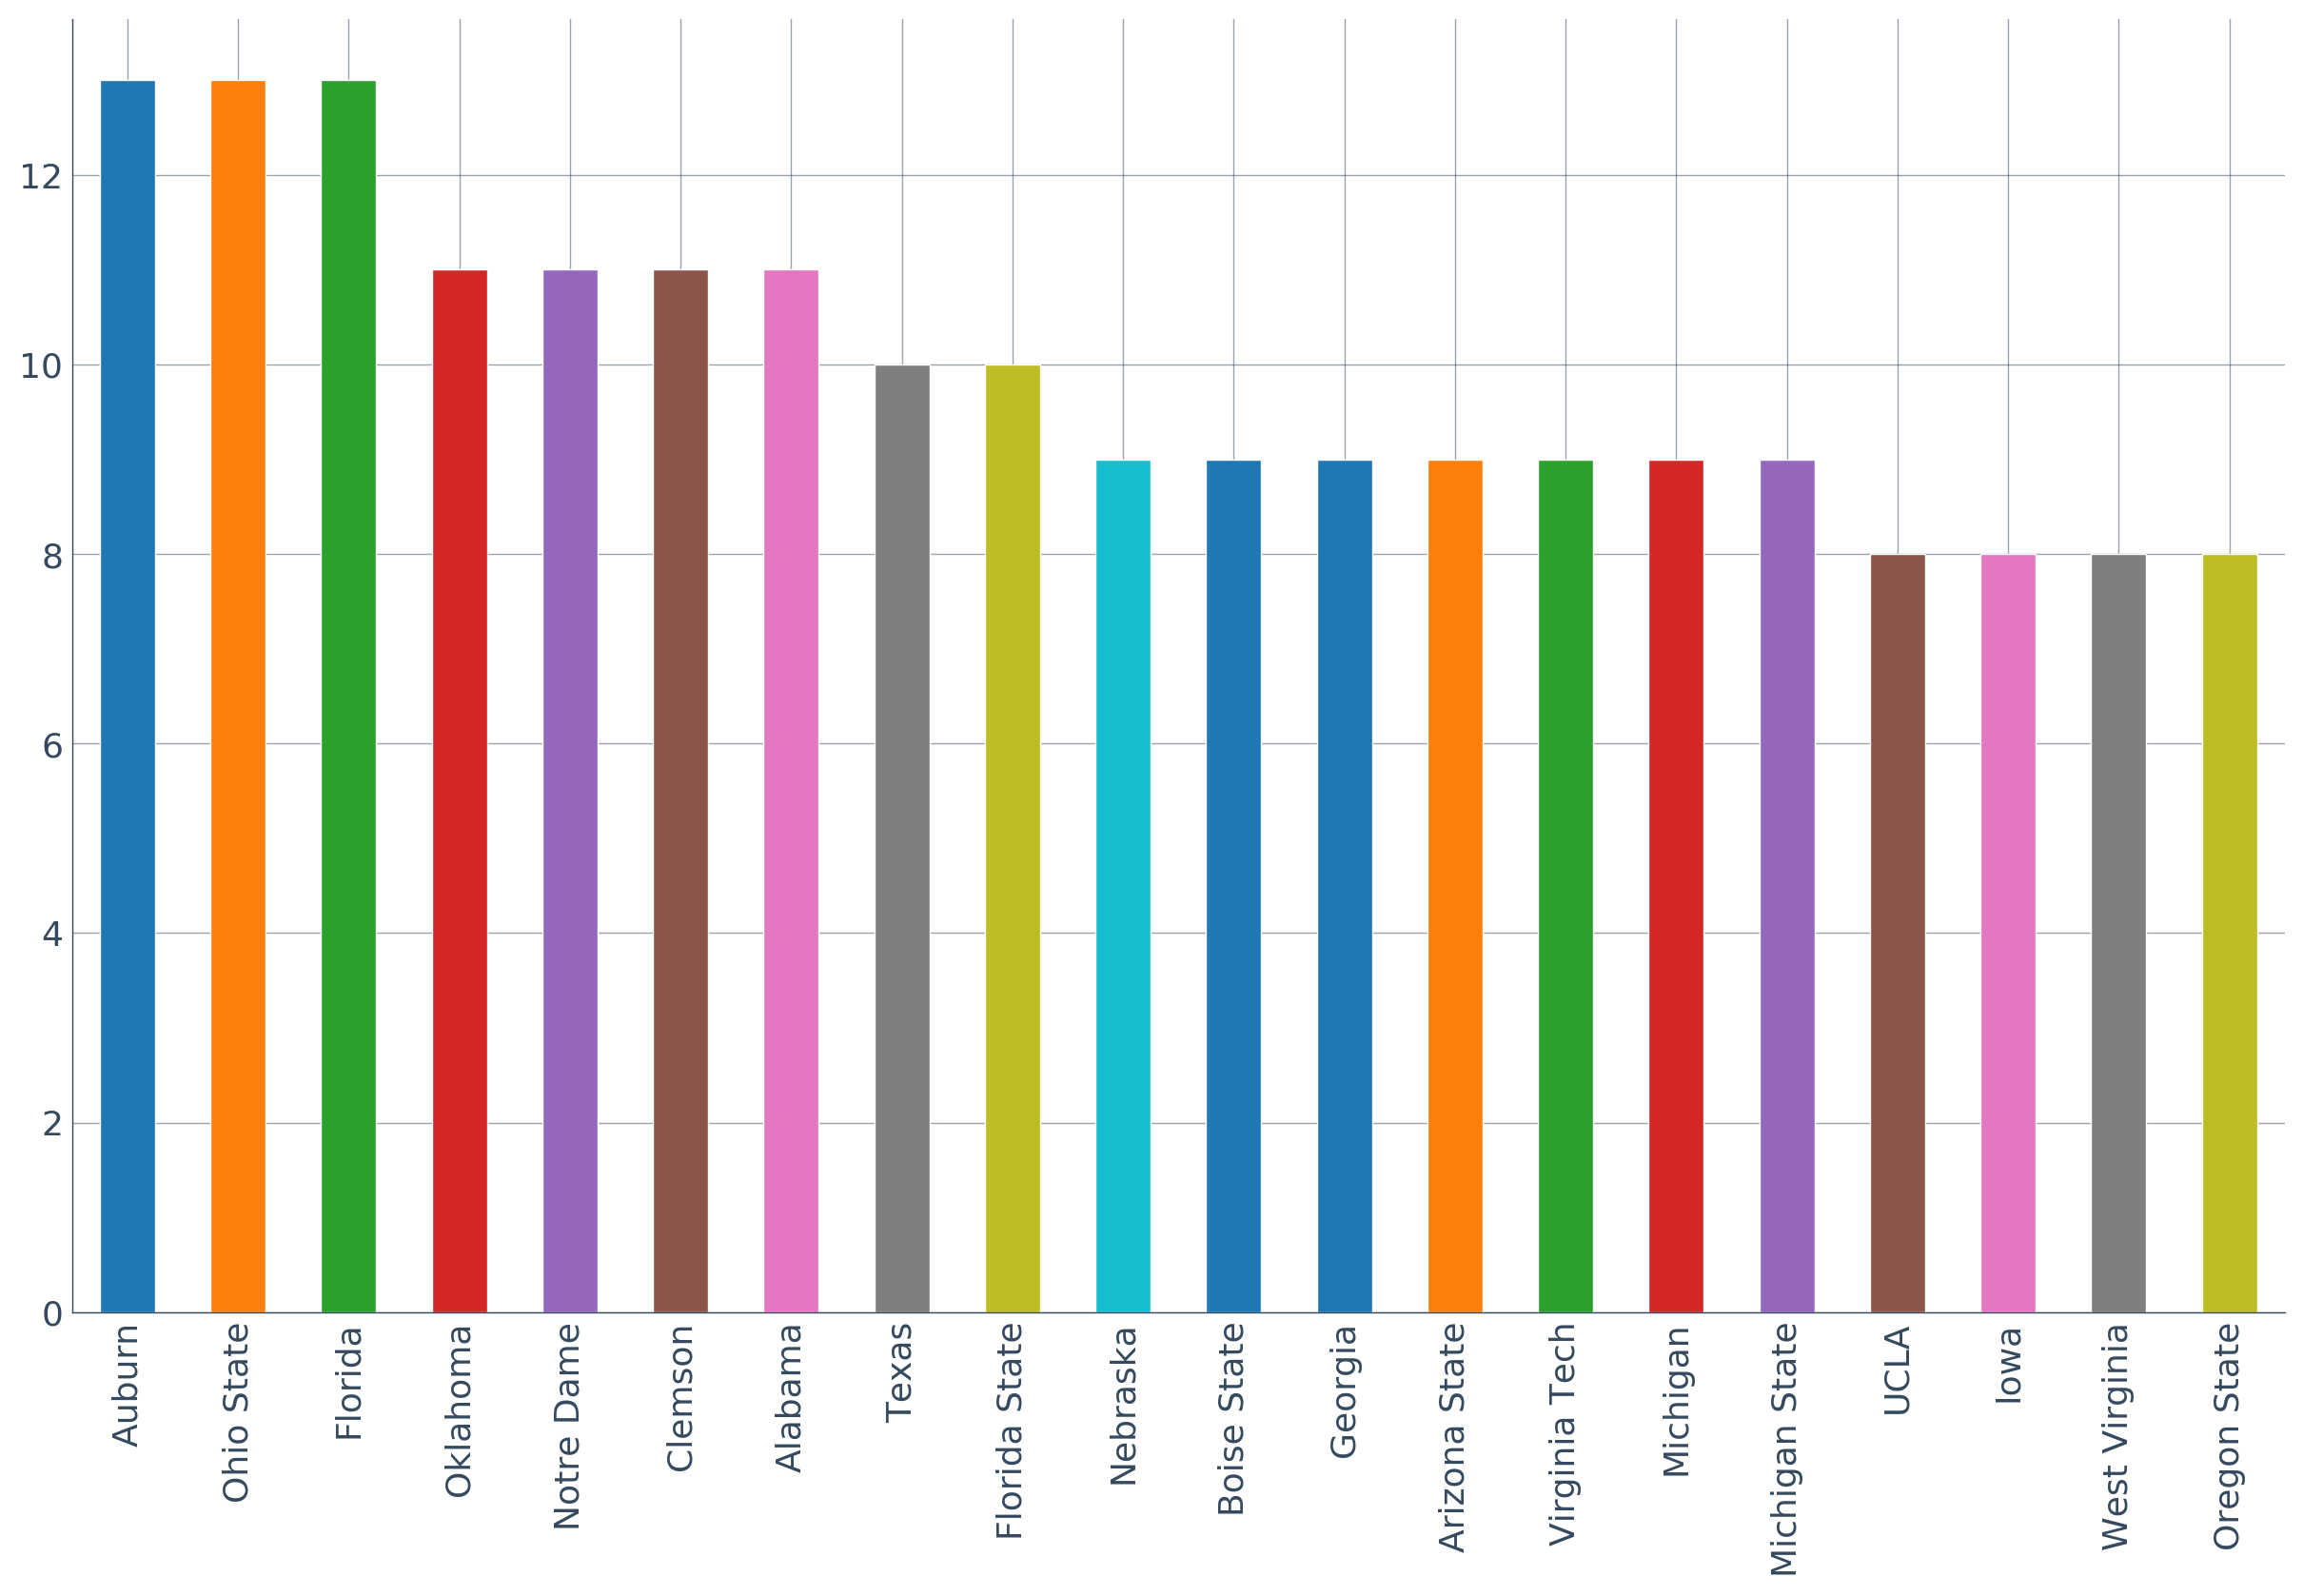

In [60]:
nfl.team.value_counts().head(20).plot(kind = 'bar');

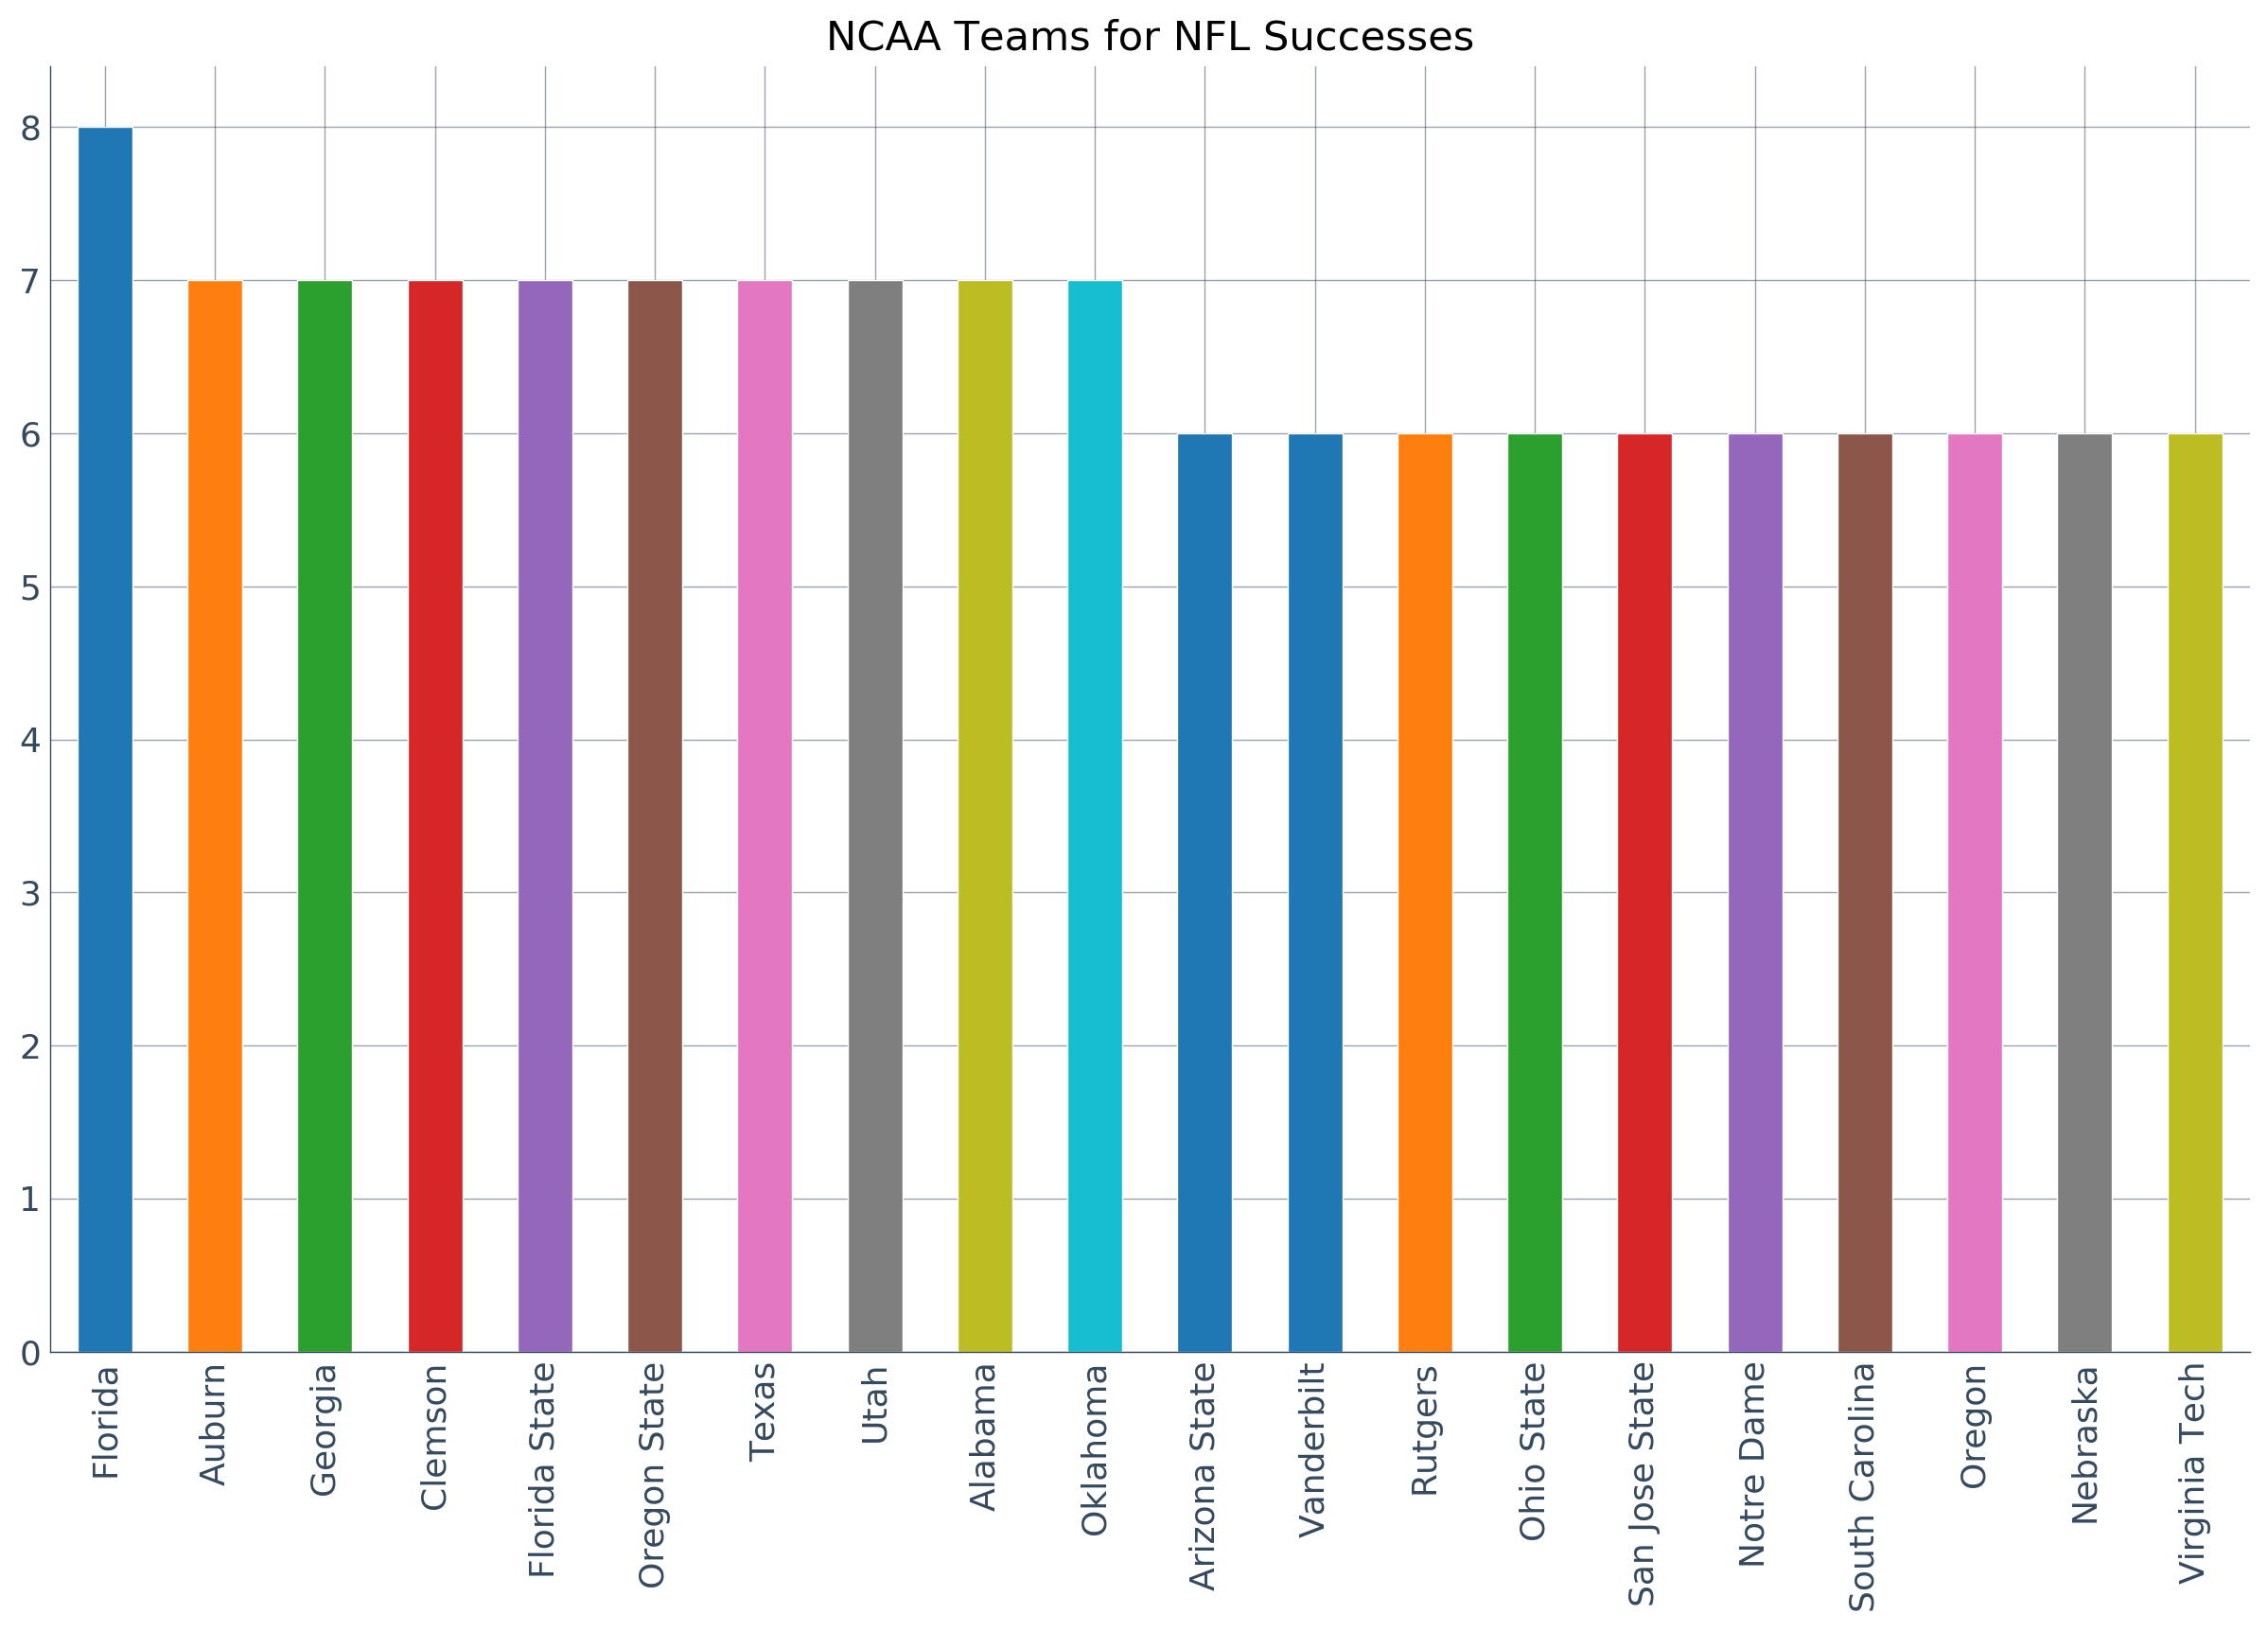

In [61]:
successes.team.value_counts().head(20).plot(kind = 'bar')

plt.title('NCAA Teams for NFL Successes');

### Outliers

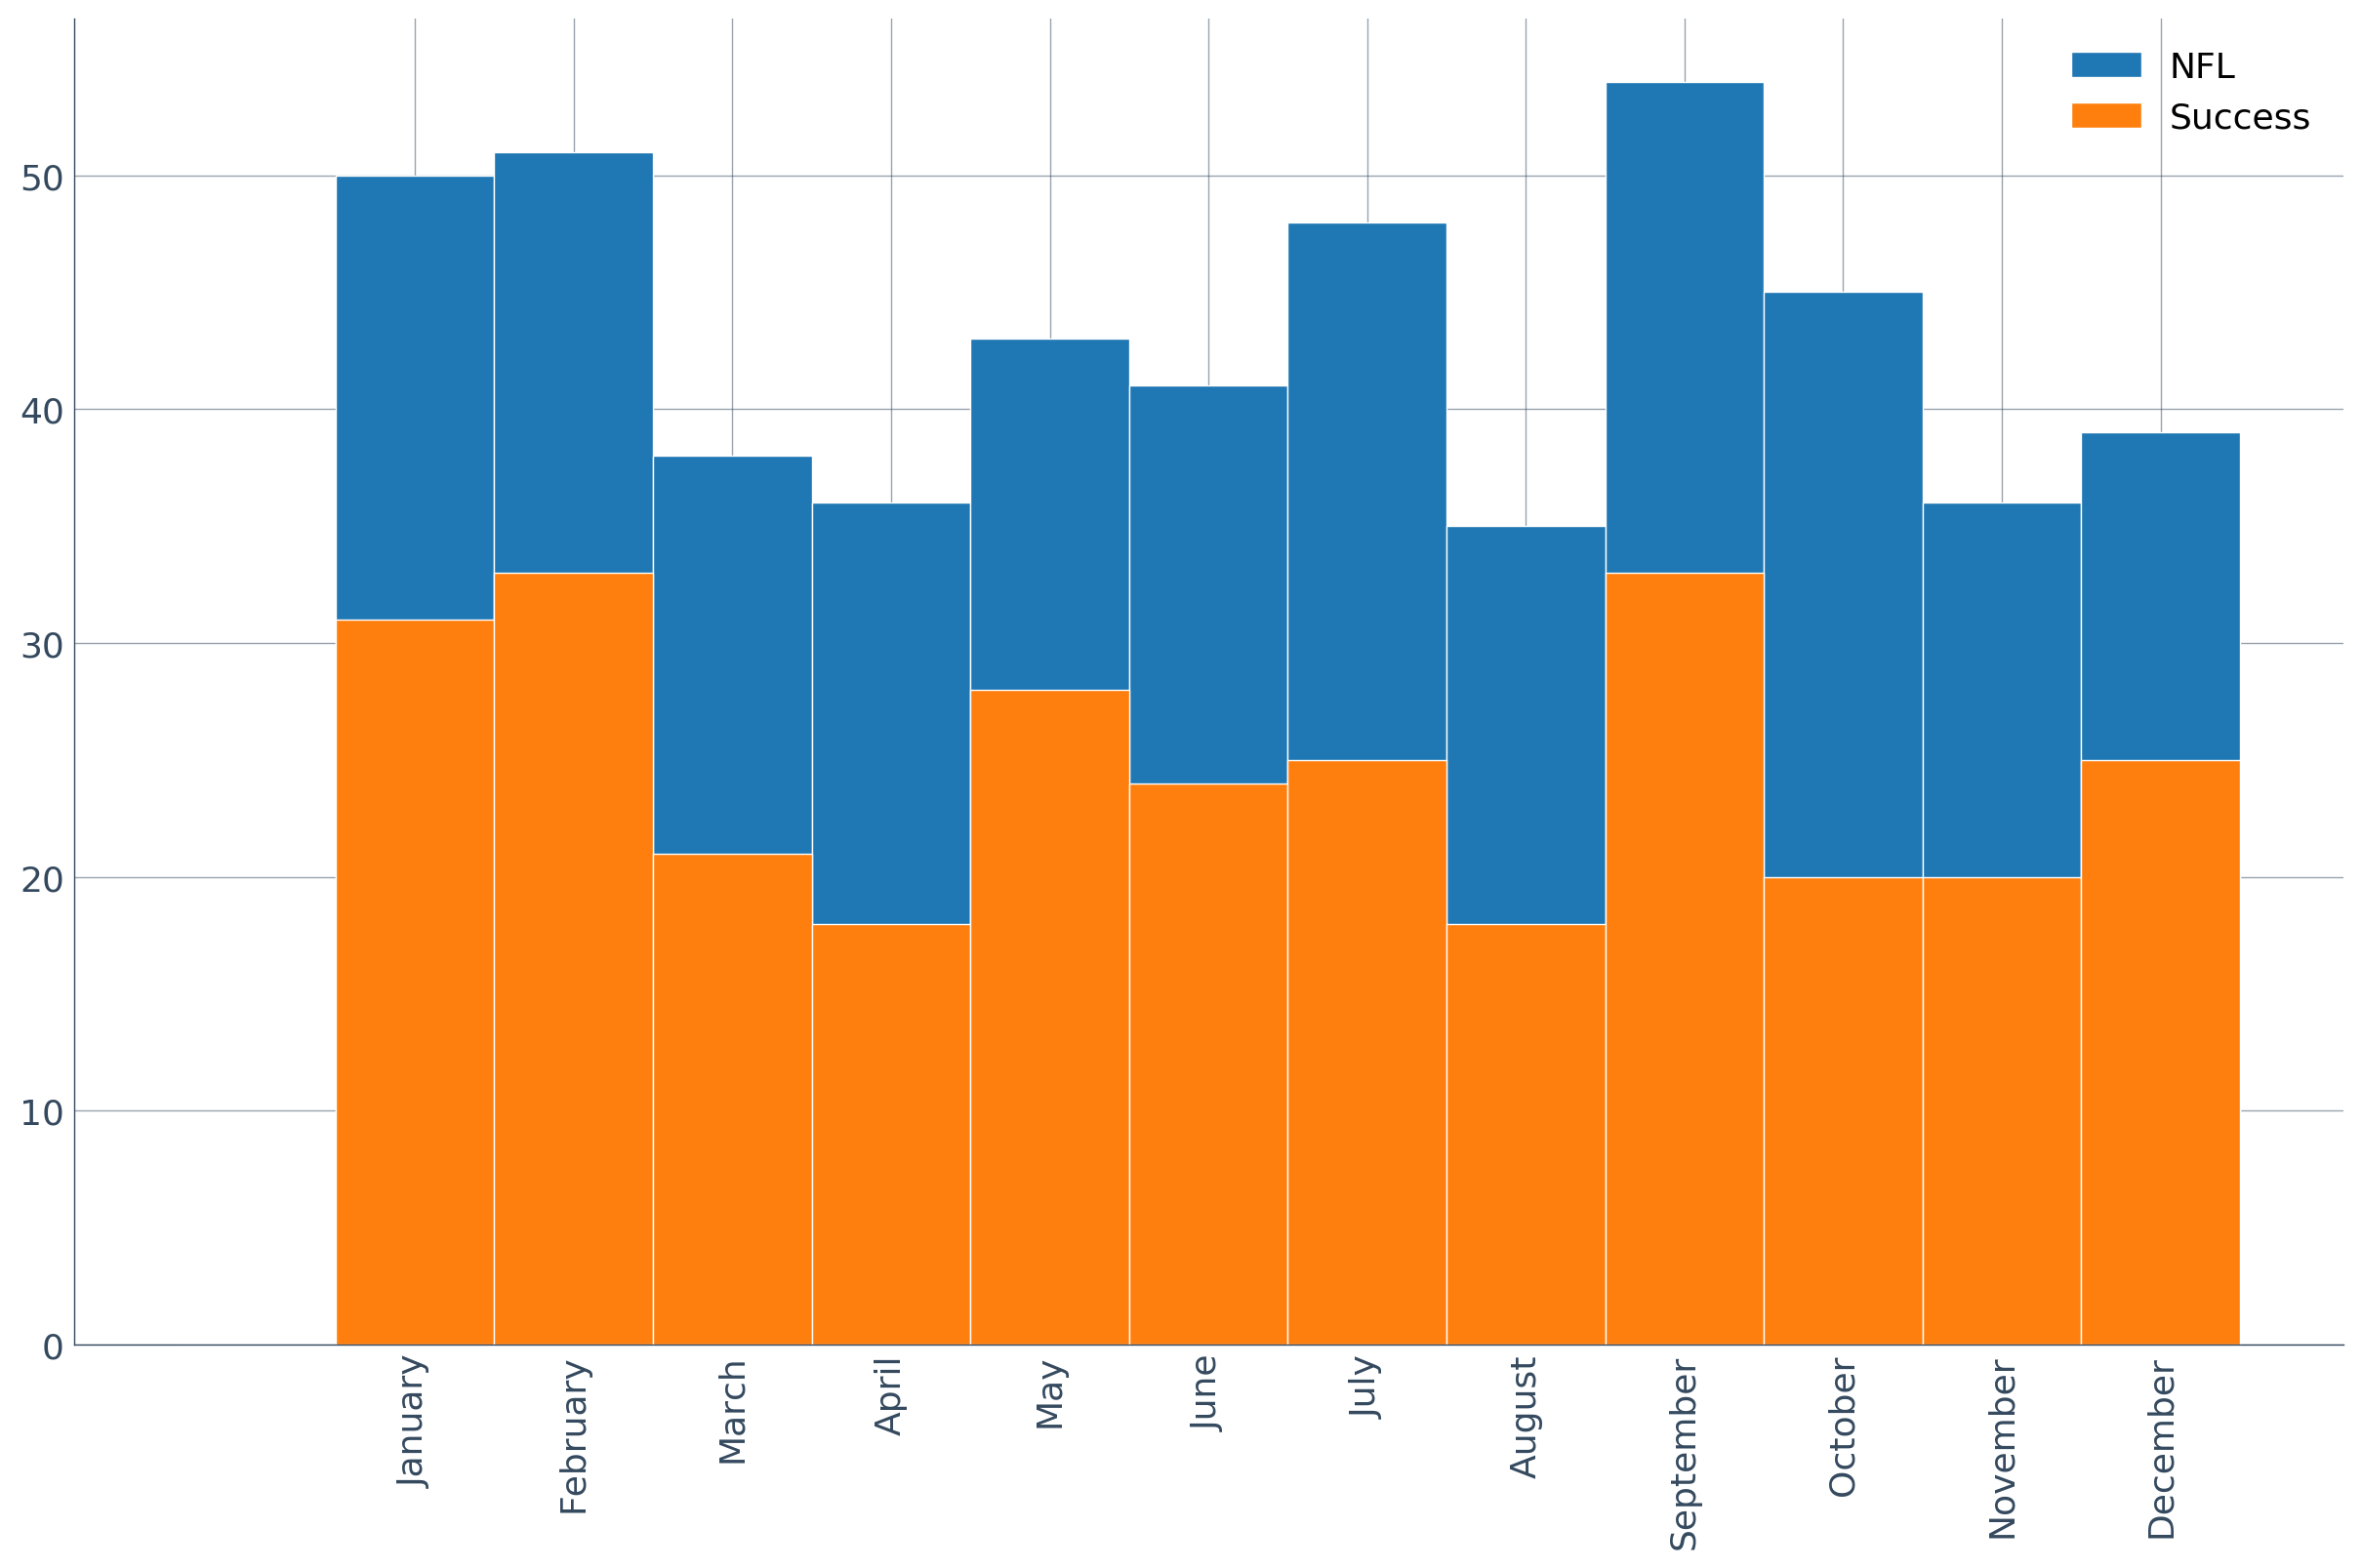

In [62]:
import calendar
_ = plt.hist(nfl.birth_month.dropna(), bins=np.arange(14)-0.5)
_ = plt.hist(successes.birth_month.dropna(), bins=np.arange(14)-0.5)


plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.legend(['NFL', 'Success']);

### Correlations

In [63]:
pd.crosstab(df.home_state, df.success).sort_values(by = False, ascending=False)

success,False,True
home_state,,
TX,899,39
FL,822,43
CA,703,45
GA,365,25
OH,333,11
LA,204,12
AL,185,14
MI,148,2
PA,145,7


In [64]:
pd.options.display.float_format = '{:.3f}'.format

# create a correlation matrix
corr_matrix = df.corr().abs()

# select upper triangle of correlation matrix
upper  = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
corr_matrix

upper

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,in_nfl,success,birth_month
height,1.000,0.507,0.101,0.115,0.108,0.155,0.095,0.121,0.090,0.070,0.055,0.071,0.069,0.046,0.007,0.091,0.024,0.009,0.095,0.003,0.095,0.083,0.040,0.091,0.088,0.033,0.011,0.092,0.063,0.065
weight,0.507,1.000,0.184,0.210,0.206,0.286,0.209,0.233,0.201,0.175,0.132,0.166,0.108,0.094,0.033,0.208,0.072,0.037,0.204,0.016,0.058,0.046,0.021,0.038,0.037,0.017,0.014,0.092,0.087,0.028
ncaa_yr_ct,0.101,0.184,1.000,0.775,0.510,0.472,0.365,0.332,0.338,0.230,0.169,0.231,0.360,0.290,0.207,0.340,0.126,0.134,0.334,0.024,0.096,0.086,0.063,0.107,0.100,0.055,0.170,0.168,0.118,0.091
games,0.115,0.210,0.775,1.000,0.762,0.698,0.562,0.506,0.521,0.356,0.244,0.354,0.568,0.457,0.321,0.522,0.195,0.214,0.512,0.048,0.179,0.162,0.119,0.192,0.182,0.094,0.248,0.304,0.225,0.085
tackles_solo,0.108,0.206,0.510,0.762,1.000,0.891,0.759,0.673,0.688,0.461,0.311,0.457,0.757,0.614,0.415,0.695,0.263,0.272,0.680,0.059,0.192,0.179,0.113,0.151,0.147,0.083,0.163,0.426,0.331,0.064
tackles_asst,0.155,0.286,0.472,0.698,0.891,1.000,0.687,0.746,0.645,0.438,0.352,0.439,0.655,0.522,0.327,0.661,0.237,0.238,0.651,0.076,0.122,0.110,0.056,0.088,0.084,0.047,0.117,0.327,0.257,0.045
tfl_solo,0.095,0.209,0.365,0.562,0.759,0.687,1.000,0.699,0.938,0.756,0.438,0.732,0.546,0.445,0.342,0.610,0.200,0.246,0.600,0.102,0.146,0.141,0.118,0.107,0.105,0.052,0.138,0.345,0.281,0.014
tfl_asst,0.121,0.233,0.332,0.506,0.673,0.746,0.699,1.000,0.727,0.539,0.566,0.551,0.466,0.370,0.267,0.527,0.174,0.205,0.520,0.118,0.096,0.092,0.057,0.067,0.065,0.038,0.102,0.271,0.207,0.016
tfl_yards,0.090,0.201,0.338,0.521,0.688,0.645,0.938,0.727,1.000,0.855,0.528,0.873,0.481,0.393,0.305,0.595,0.192,0.243,0.588,0.116,0.141,0.144,0.126,0.099,0.098,0.056,0.130,0.313,0.259,0.001
sacks_solo,0.070,0.175,0.230,0.356,0.461,0.438,0.756,0.539,0.855,1.000,0.459,0.953,0.281,0.233,0.190,0.454,0.132,0.185,0.451,0.114,0.082,0.090,0.091,0.065,0.065,0.041,0.089,0.187,0.160,0.037


,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,in_nfl,success,birth_month
height,nan,0.507,0.101,0.115,0.108,0.155,0.095,0.121,0.090,0.070,0.055,0.071,0.069,0.046,0.007,0.091,0.024,0.009,0.095,0.003,0.095,0.083,0.040,0.091,0.088,0.033,0.011,0.092,0.063,0.065
weight,nan,nan,0.184,0.210,0.206,0.286,0.209,0.233,0.201,0.175,0.132,0.166,0.108,0.094,0.033,0.208,0.072,0.037,0.204,0.016,0.058,0.046,0.021,0.038,0.037,0.017,0.014,0.092,0.087,0.028
ncaa_yr_ct,nan,nan,nan,0.775,0.510,0.472,0.365,0.332,0.338,0.230,0.169,0.231,0.360,0.290,0.207,0.340,0.126,0.134,0.334,0.024,0.096,0.086,0.063,0.107,0.100,0.055,0.170,0.168,0.118,0.091
games,nan,nan,nan,nan,0.762,0.698,0.562,0.506,0.521,0.356,0.244,0.354,0.568,0.457,0.321,0.522,0.195,0.214,0.512,0.048,0.179,0.162,0.119,0.192,0.182,0.094,0.248,0.304,0.225,0.085
tackles_solo,nan,nan,nan,nan,nan,0.891,0.759,0.673,0.688,0.461,0.311,0.457,0.757,0.614,0.415,0.695,0.263,0.272,0.680,0.059,0.192,0.179,0.113,0.151,0.147,0.083,0.163,0.426,0.331,0.064
tackles_asst,nan,nan,nan,nan,nan,nan,0.687,0.746,0.645,0.438,0.352,0.439,0.655,0.522,0.327,0.661,0.237,0.238,0.651,0.076,0.122,0.110,0.056,0.088,0.084,0.047,0.117,0.327,0.257,0.045
tfl_solo,nan,nan,nan,nan,nan,nan,nan,0.699,0.938,0.756,0.438,0.732,0.546,0.445,0.342,0.610,0.200,0.246,0.600,0.102,0.146,0.141,0.118,0.107,0.105,0.052,0.138,0.345,0.281,0.014
tfl_asst,nan,nan,nan,nan,nan,nan,nan,nan,0.727,0.539,0.566,0.551,0.466,0.370,0.267,0.527,0.174,0.205,0.520,0.118,0.096,0.092,0.057,0.067,0.065,0.038,0.102,0.271,0.207,0.016
tfl_yards,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.855,0.528,0.873,0.481,0.393,0.305,0.595,0.192,0.243,0.588,0.116,0.141,0.144,0.126,0.099,0.098,0.056,0.130,0.313,0.259,0.001
sacks_solo,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.459,0.953,0.281,0.233,0.190,0.454,0.132,0.185,0.451,0.114,0.082,0.090,0.091,0.065,0.065,0.041,0.089,0.187,0.160,0.037


In [65]:
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.95)]

correlated = [column for column in upper.columns if any(upper[column] > 0.60)]

highly_correlated

correlated

['sacks_yards', 'ffum', 'punt_ret_yards', 'kick_ret_yards']

['games',
 'tackles_solo',
 'tackles_asst',
 'tfl_solo',
 'tfl_asst',
 'tfl_yards',
 'sacks_solo',
 'sacks_yards',
 'int',
 'int_yards',
 'int_td',
 'fum',
 'ffum',
 'punt_ret_yards',
 'punt_ret_td',
 'kick_ret_yards',
 'kick_ret_td',
 'success']

In [66]:
df = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/MERGED_ncaa+nfl.csv', index_col=0)
df.success = df.success.fillna(False)
df.in_nfl = df.in_nfl.fillna(False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 32 columns):
team              6051 non-null object
height            6051 non-null float64
weight            6051 non-null float64
home_state        6051 non-null object
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret       

,team,height,weight,home_state,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,in_nfl,success,birth_month
0,New Mexico,71.000,199.000,NM,5.000,50.000,67.000,55.000,0.000,3.000,4.000,0.000,0.000,0.000,2.000,6.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,False,False,nan
1,Utah State,70.000,190.000,FL,4.000,37.000,52.000,35.000,1.000,1.000,6.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,False,False,nan
2,Tennessee,65.000,165.000,TN,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,False,False,nan
3,Texas A&M,65.000,169.000,TX,3.000,5.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,False,False,nan
4,Bowling Green,65.000,155.000,OH,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,False,False,nan


### Feature Engineering
- standardize numeric stats
- 1-hot encode home_state, team
- drop in_nfl, birth_month

In [67]:
df = df.drop(['team', 'home_state', 'in_nfl', 'birth_month'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 28 columns):
height            6051 non-null float64
weight            6051 non-null float64
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret          6051 non-null float64
punt_ret_yards    6051 non-null float64
punt_ret_td  

In [68]:
# df = pd.get_dummies(df, columns=['team', 'home_state'])

# # tempdf.info()
# df.info()

In [69]:
# y = df.success
# df = df.drop('success', axis = 1)

In [70]:
# len(y)
# df.info()

In [71]:
adsfasd

NameError: name 'adsfasd' is not defined

In [ ]:
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

cols = df.columns.tolist()

# list cols to scale
# cols_to_scale = ['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'tfl_yards', 
#                  'sacks_solo', 'sacks_asst', 'sacks_yards', 'int', 'int_yards', 'int_td', 'fum', 'fum_yards', 'fum_td', 'ffum', 
#                  'safety', 'punt_ret', 'punt_ret_yards', 'punt_ret_td', 'kick_ret', 'kick_ret_yards', 'kick_ret_td', 'total_points']

cols_to_scale = cols[:27]
cols_to_scale

# transform numeric stats
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

In [ ]:
# df.to_csv('~/Documents/Data Science/Data Projects/nfl_db/sausage_factory/TESTING_nfl+ncaa_scaled.csv')

## Dummy Classifier

In [ ]:
# imports
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# seed the random_state variables
SEED = 42

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = SEED)

In [ ]:
# create a dummy classifier
dummy = DummyClassifier(random_state = SEED)

# train a model
dummy.fit(X_train, y_train)

# make predictions
y_pred_proba = dummy.predict_proba(X_test)

# Get accuracy score
dummy.score(X_test, y_test)

# print classification report
print(classification_report(y_test,
                           y_pred_proba))

### Logistic Regression

In [ ]:
# CV Scores

# imports

from sklearn.linear_model import LogisticRegression

# instantiate LR algo
logit = LogisticRegression()

# fit model
logit.fit(X_train, y_train)

### Support Vector Machines

### Decision Tree

### Random Forest

In [ ]:
# Random Forest Classifier

#imports
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier
rf = RandomForestClassifier()

# train
rf.fit(X_train, y_train)

# score
rf.score(X_test, y_test)

# make predictions
y_pred_proba = rf.predict(X_test)

# print classification report
print(classification_report(y_test,
                           y_pred_proba))

In [ ]:


# make predictions
y_pred_proba = rf.predict(X_test)

# print classification report
print(classification_report(y_test,
                           y_pred_proba))

### AdaBoost

### Gradient Boost

### XGBoost

### Logistic Regression / Cross Validation

In [ ]:
# cross-validate model using accuracy
cross_val_score(logit, X, y, scoring = 'accuracy')

In [ ]:
# cross-validate using recall
cross_val_score(logit, X, y, scoring = 'recall')

In [ ]:
# cross-validate using precision
cross_val_score(logit, X, y, scoring = 'precision')

In [ ]:
# cross-validate using F1
cross_val_score(logit, X, y, scoring = 'f1')

In [ ]:
# imports
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
y_pred_proba = logit.predict_proba(X_test)[:,1]

# create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls = '--')
plt.plot([0, 0], [1, 0], c = '.7'), plt.plot([1, 1], c = '.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
# imports
from sklearn.metrics import roc_curve, roc_auc_score

# get predicted probabilities
y_pred_proba = rf.predict_proba(X_test)[:,1]

# create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls = '--')
plt.plot([0, 0], [1, 0], c = '.7'), plt.plot([1, 1], c = '.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');


### Random Forest / Cross Validation

In [ ]:
# cross-validate model using accuracy
cross_val_score(rf, X, y, scoring = 'accuracy')

In [ ]:
# cross-validate using recall
cross_val_score(rf, X, y, scoring = 'recall')

In [ ]:
# cross-validate using precision
cross_val_score(rf, X, y, scoring = 'precision')

In [ ]:
# cross-validate using F1
cross_val_score(rf, X, y, scoring = 'f1')

### Classification Report